In [1]:
"""
Preamble for most code and jupyter notebooks
@author: bridgetsmart
@notebook date: 19 Dec 2022
"""

import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl

import math, string, re, pickle, json, time, os, sys, datetime, itertools

from tqdm.notebook import tqdm

# Set packages to autoreload
%load_ext autoreload
%autoreload 2

In [2]:
with open(f'results/all_results.pkl', 'rb') as f:
    df1 = pickle.load(f)


with open(f'results/all_results2.pkl', 'rb') as f:
    df2 = pickle.load(f)


with open(f'results/all_results_julia.pkl', 'rb') as f:
    df3 = pickle.load(f)

In [5]:
frames = [df1, df2, df3]
df_plot = pd.concat(frames)

In [6]:
df = df_plot.copy()

In [178]:
map_names = {x:x for x in set(df['Time delay function'].values)}
map_names['exp mean 2']='exp mean 0.5'
map_names['exp mean 5'] ='exp mean 0.2'

In [181]:
df['Time delay function'] = df['Time delay function'].map(map_names)

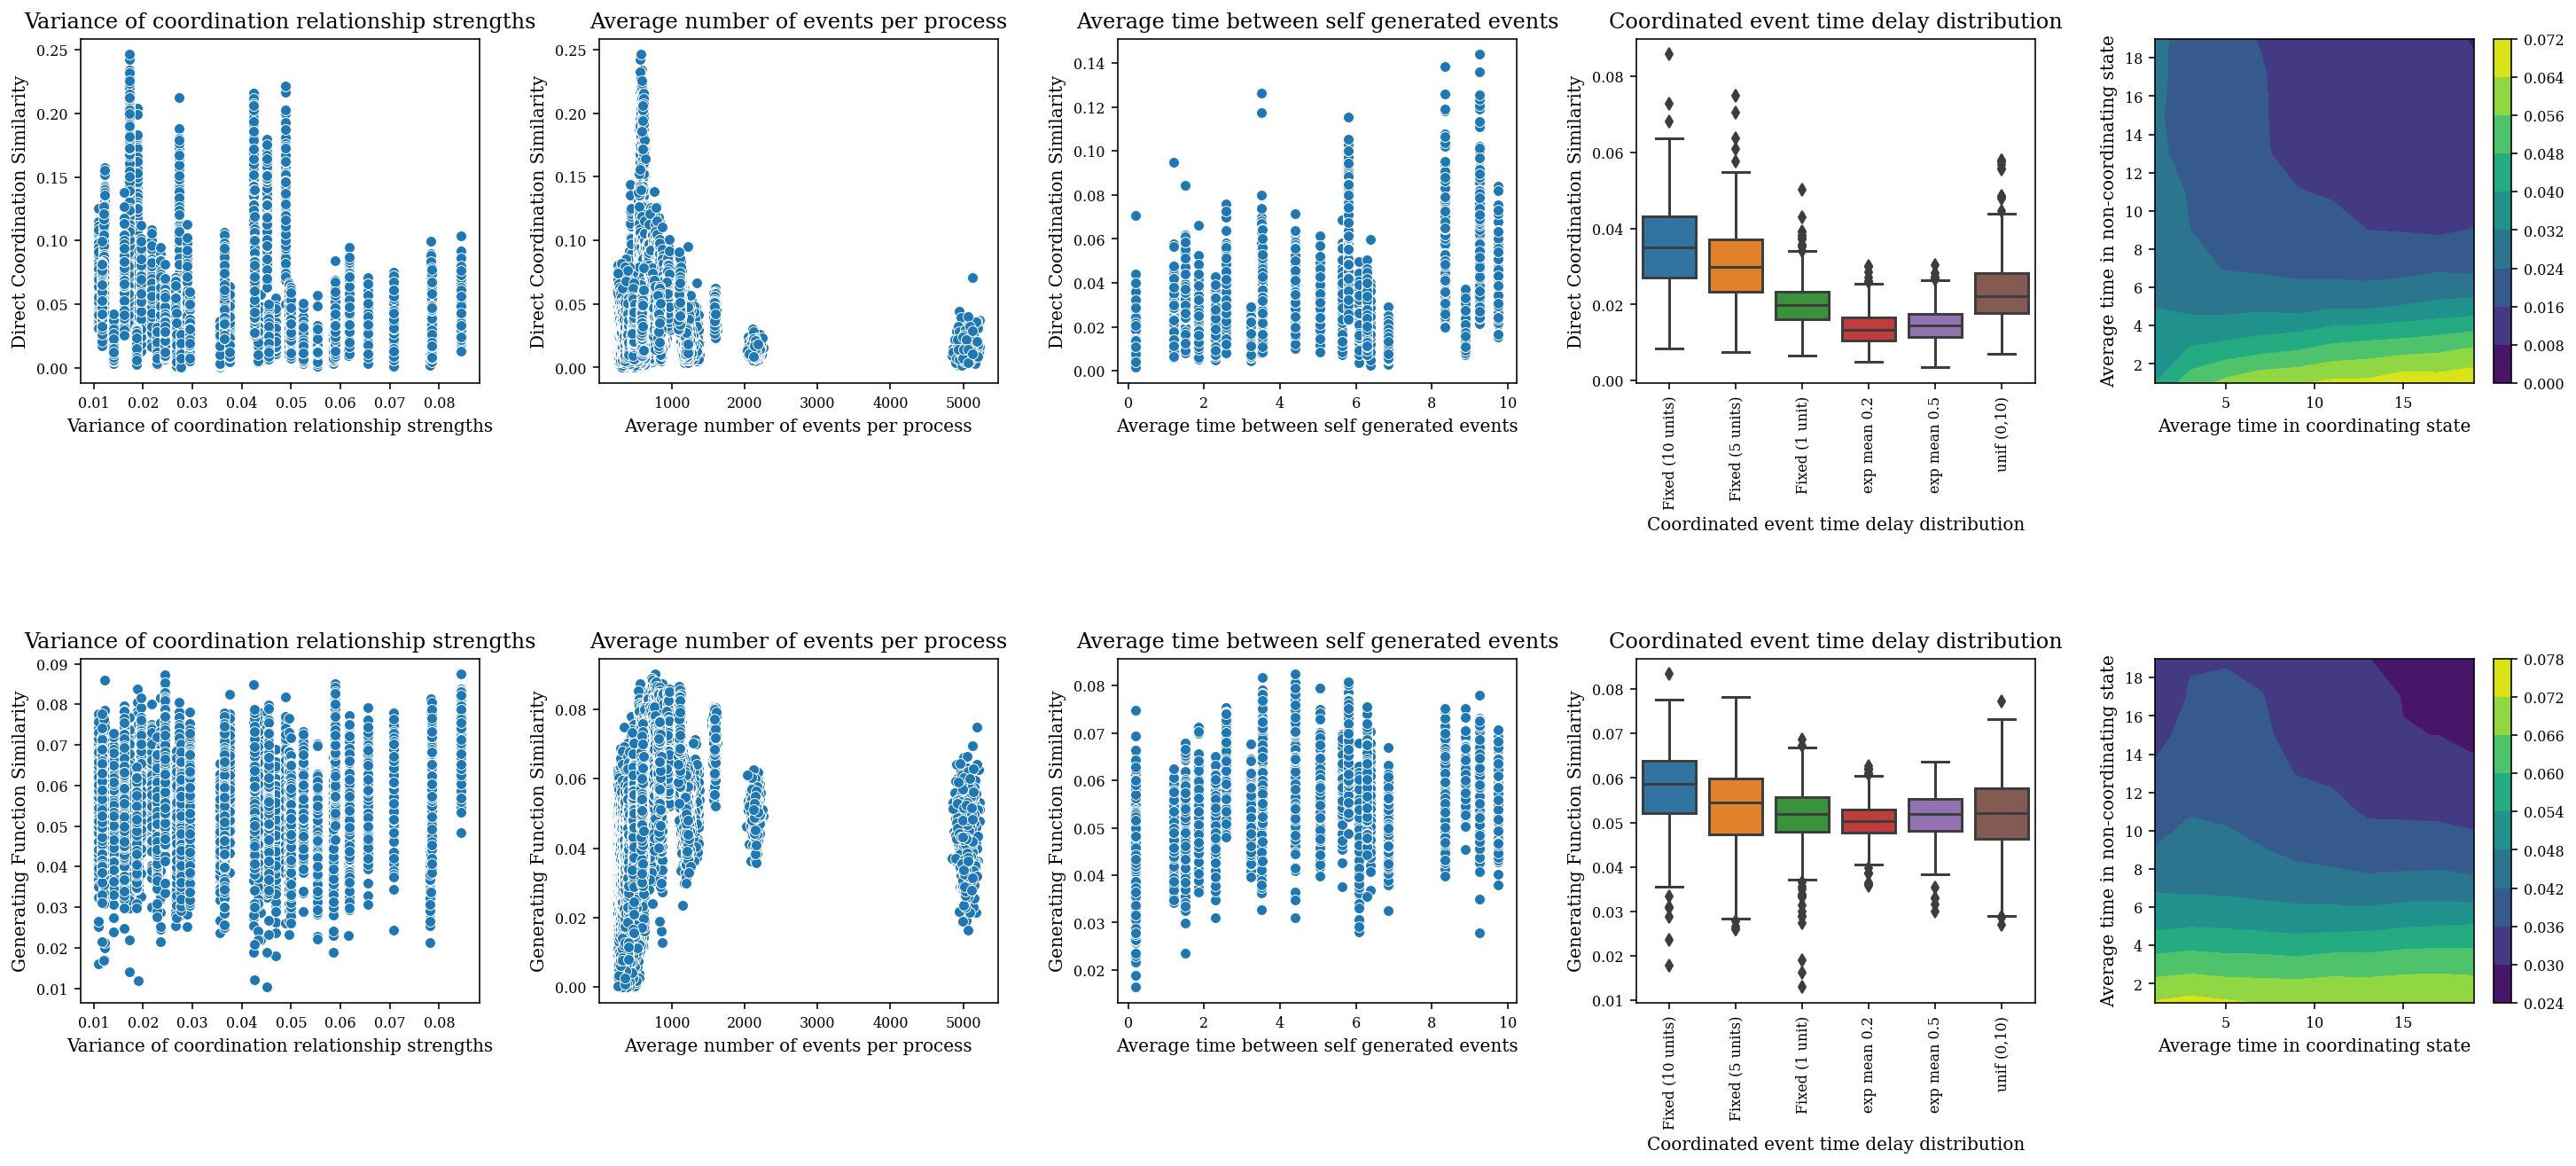

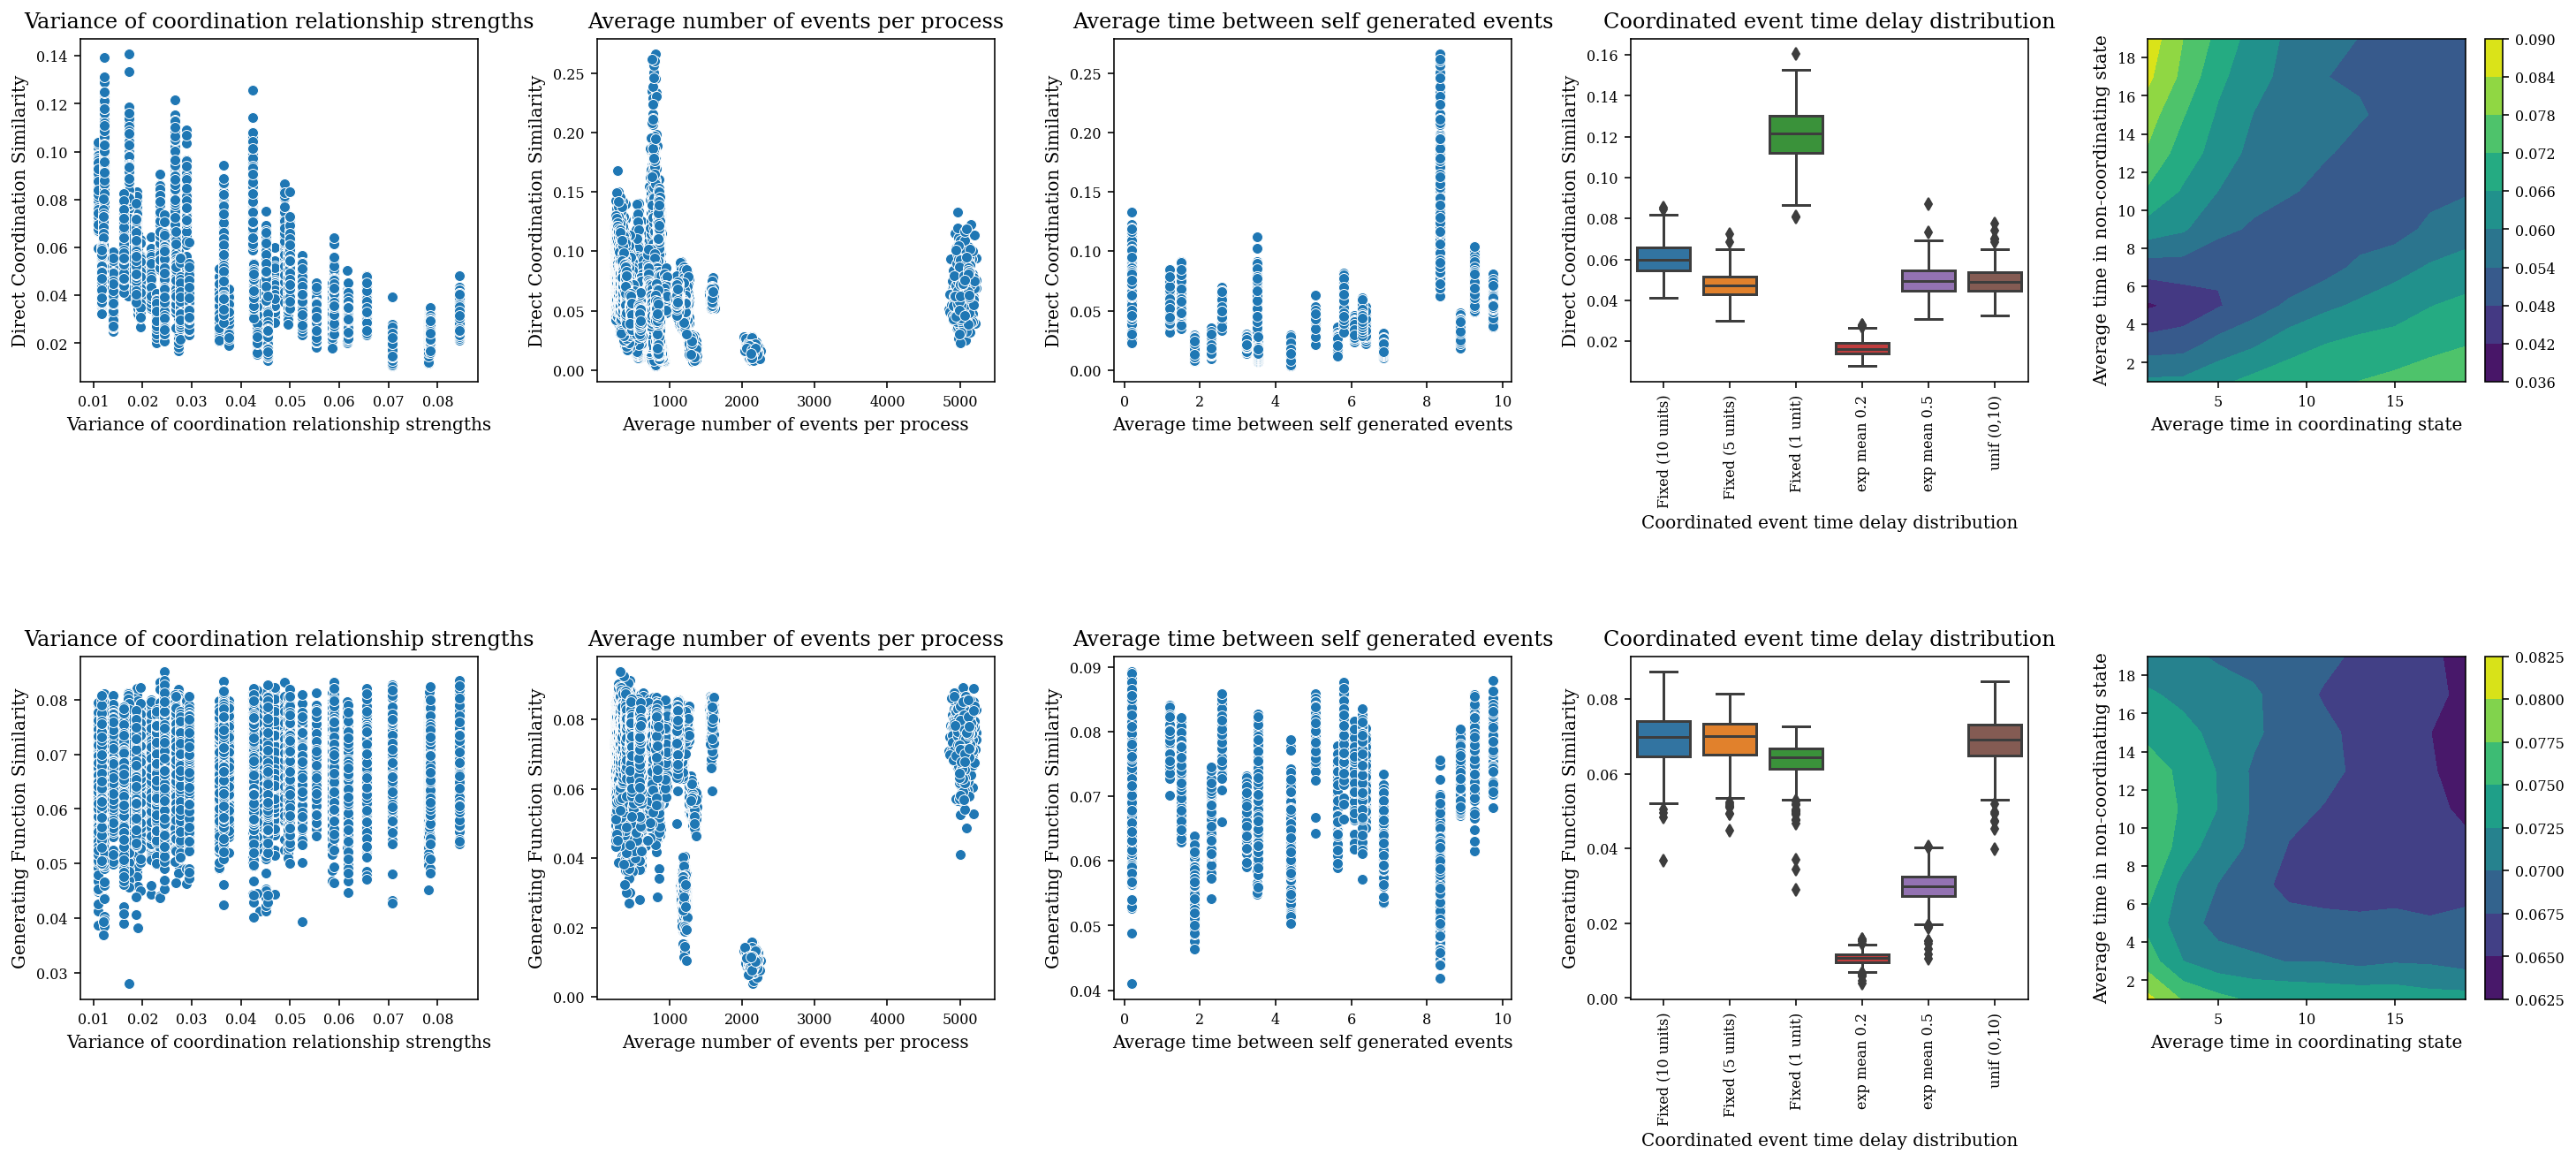

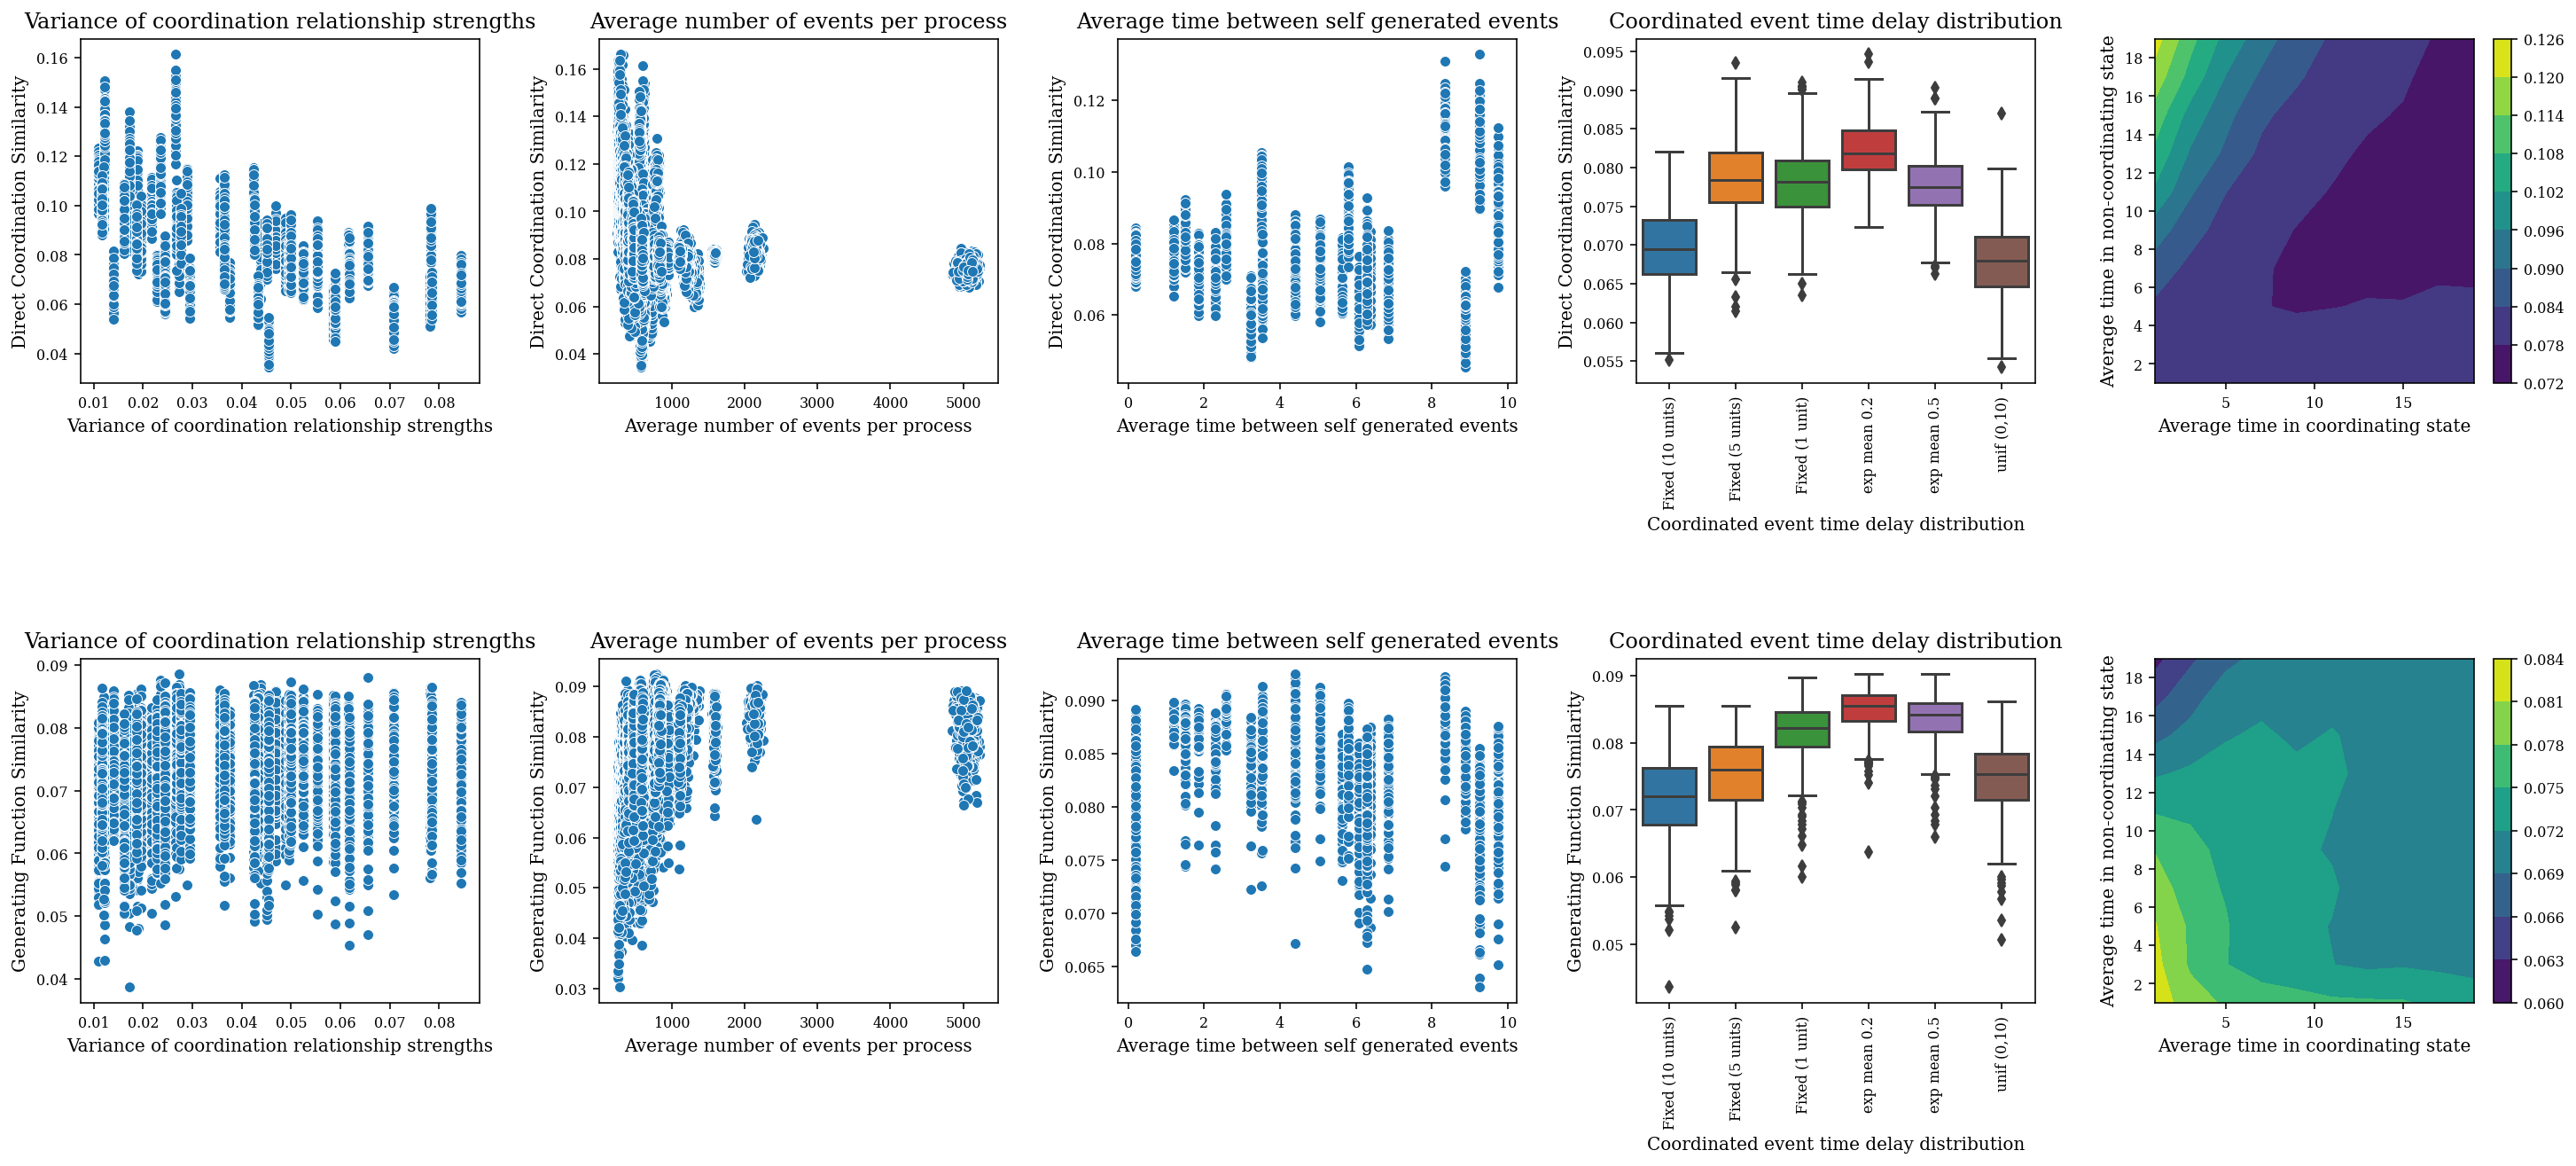

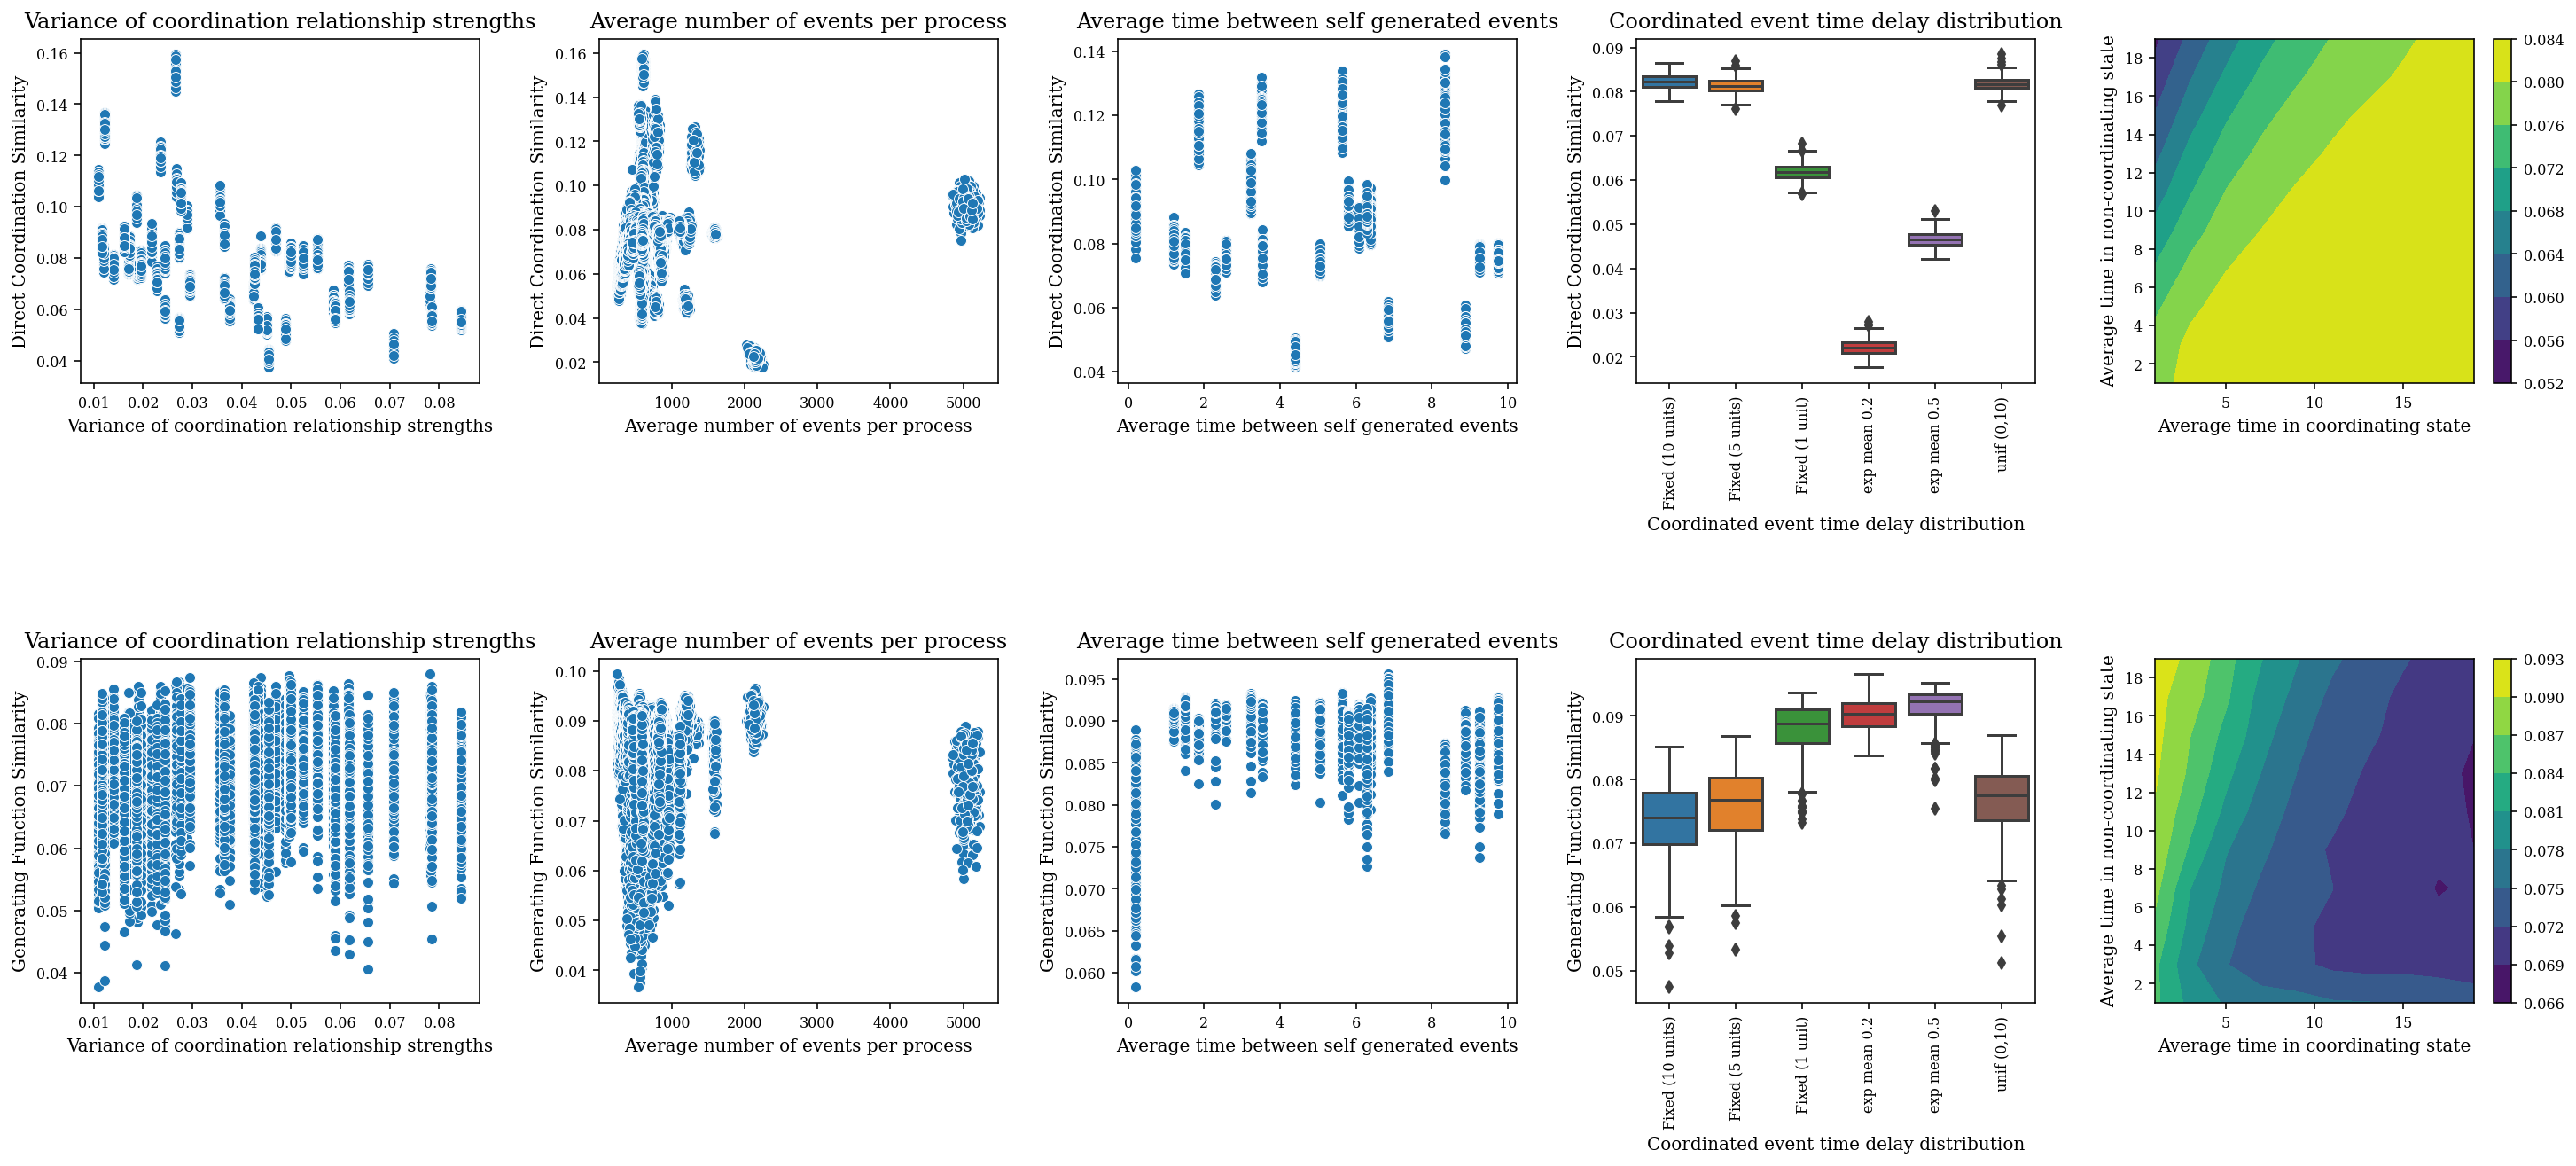

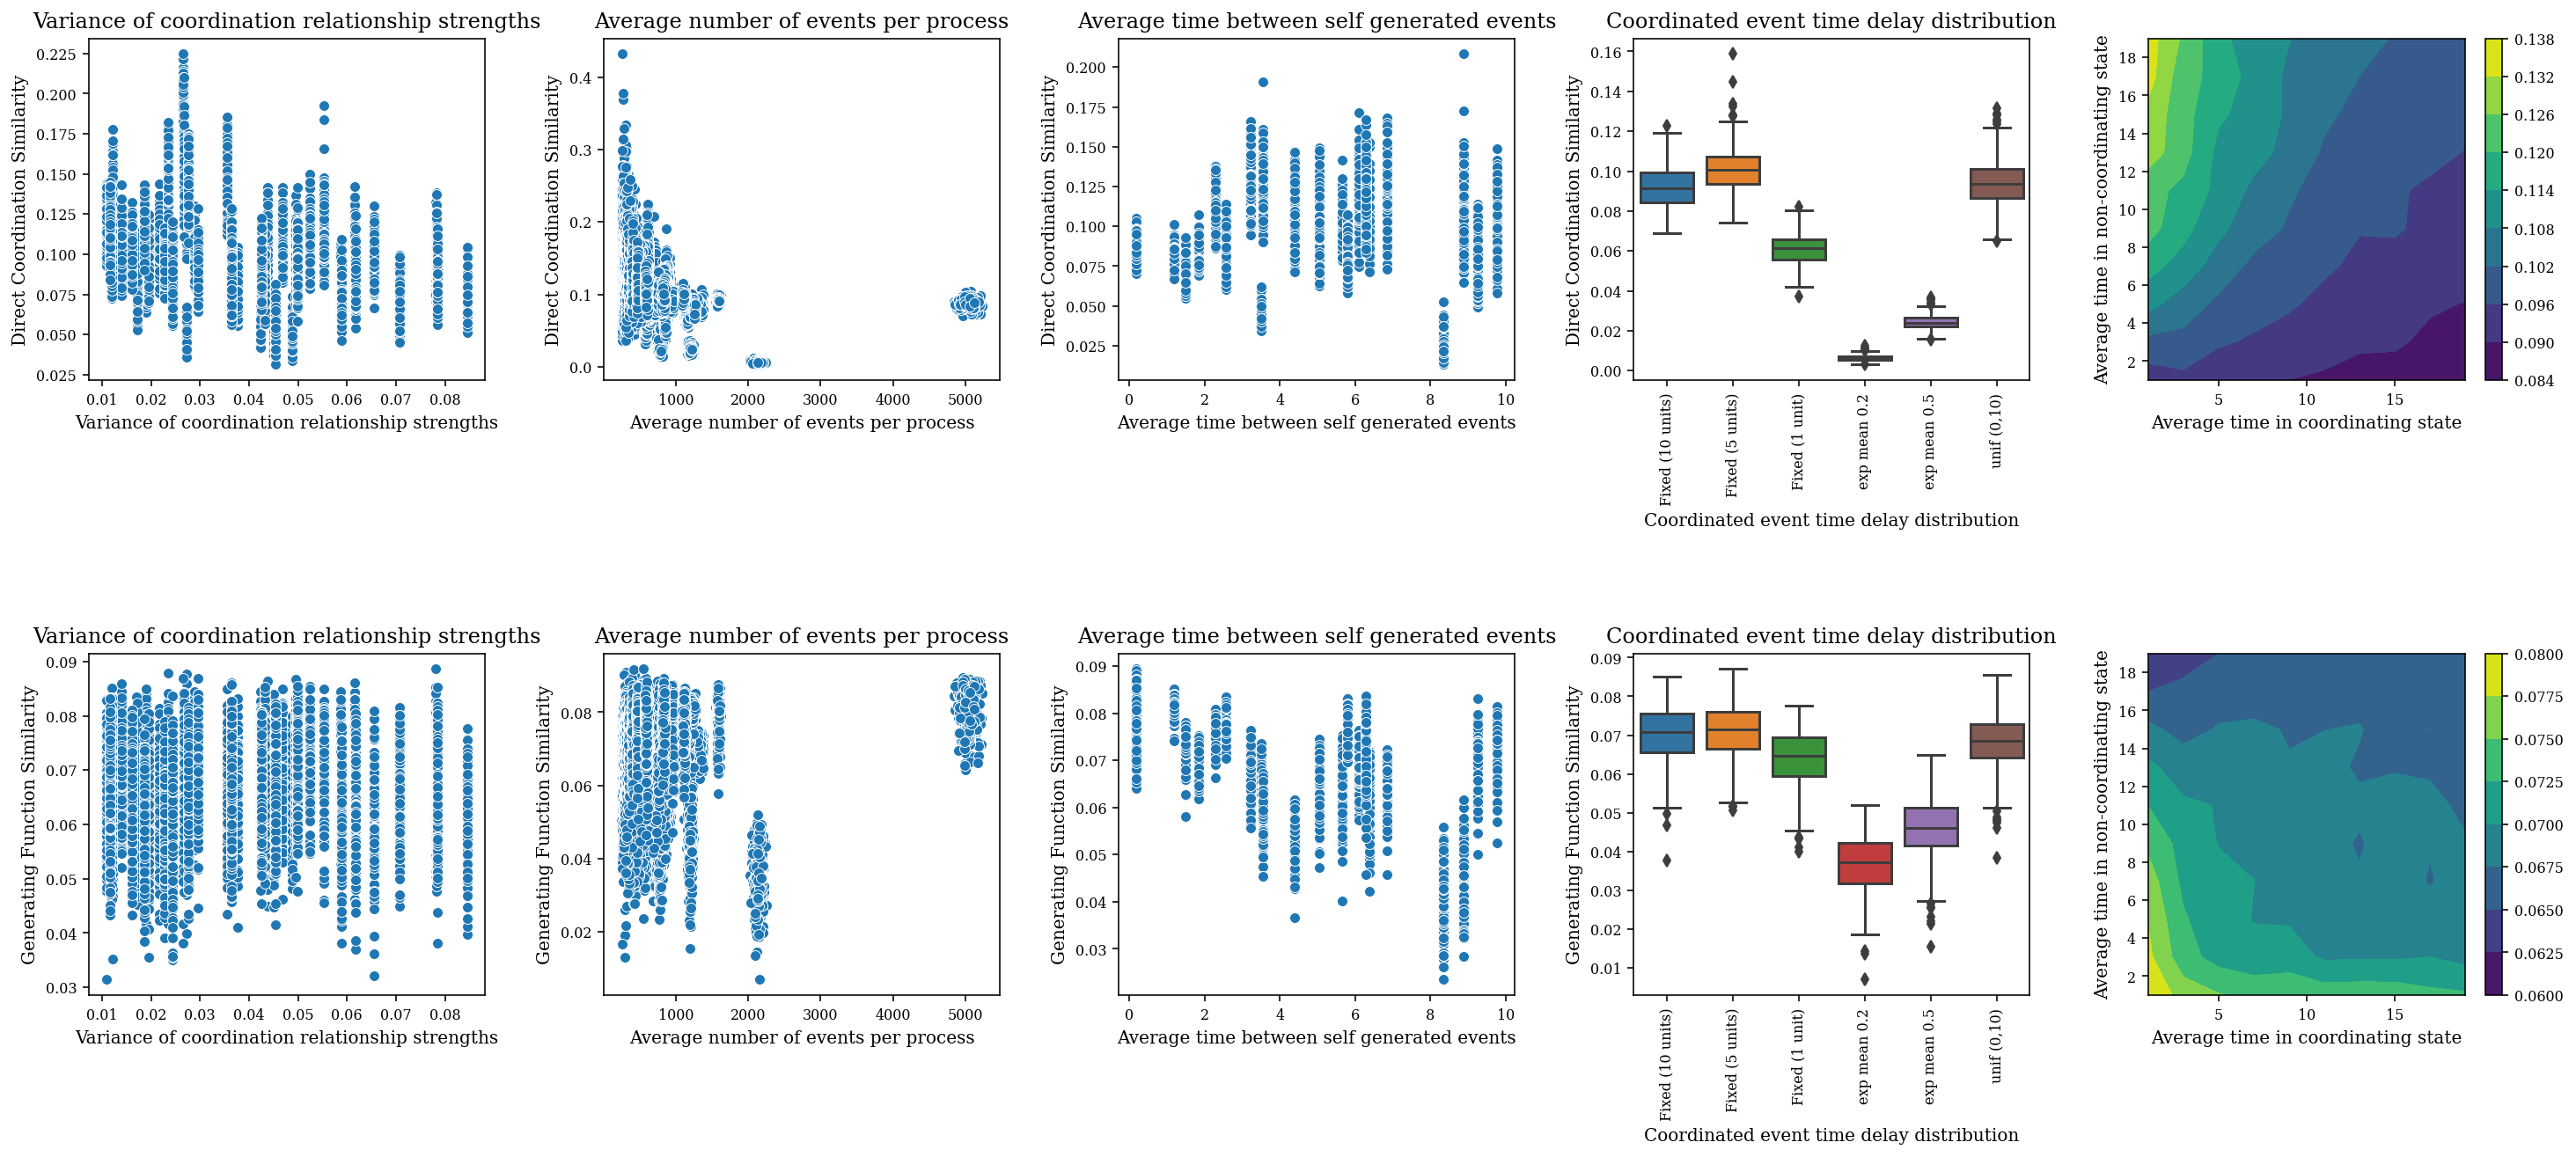

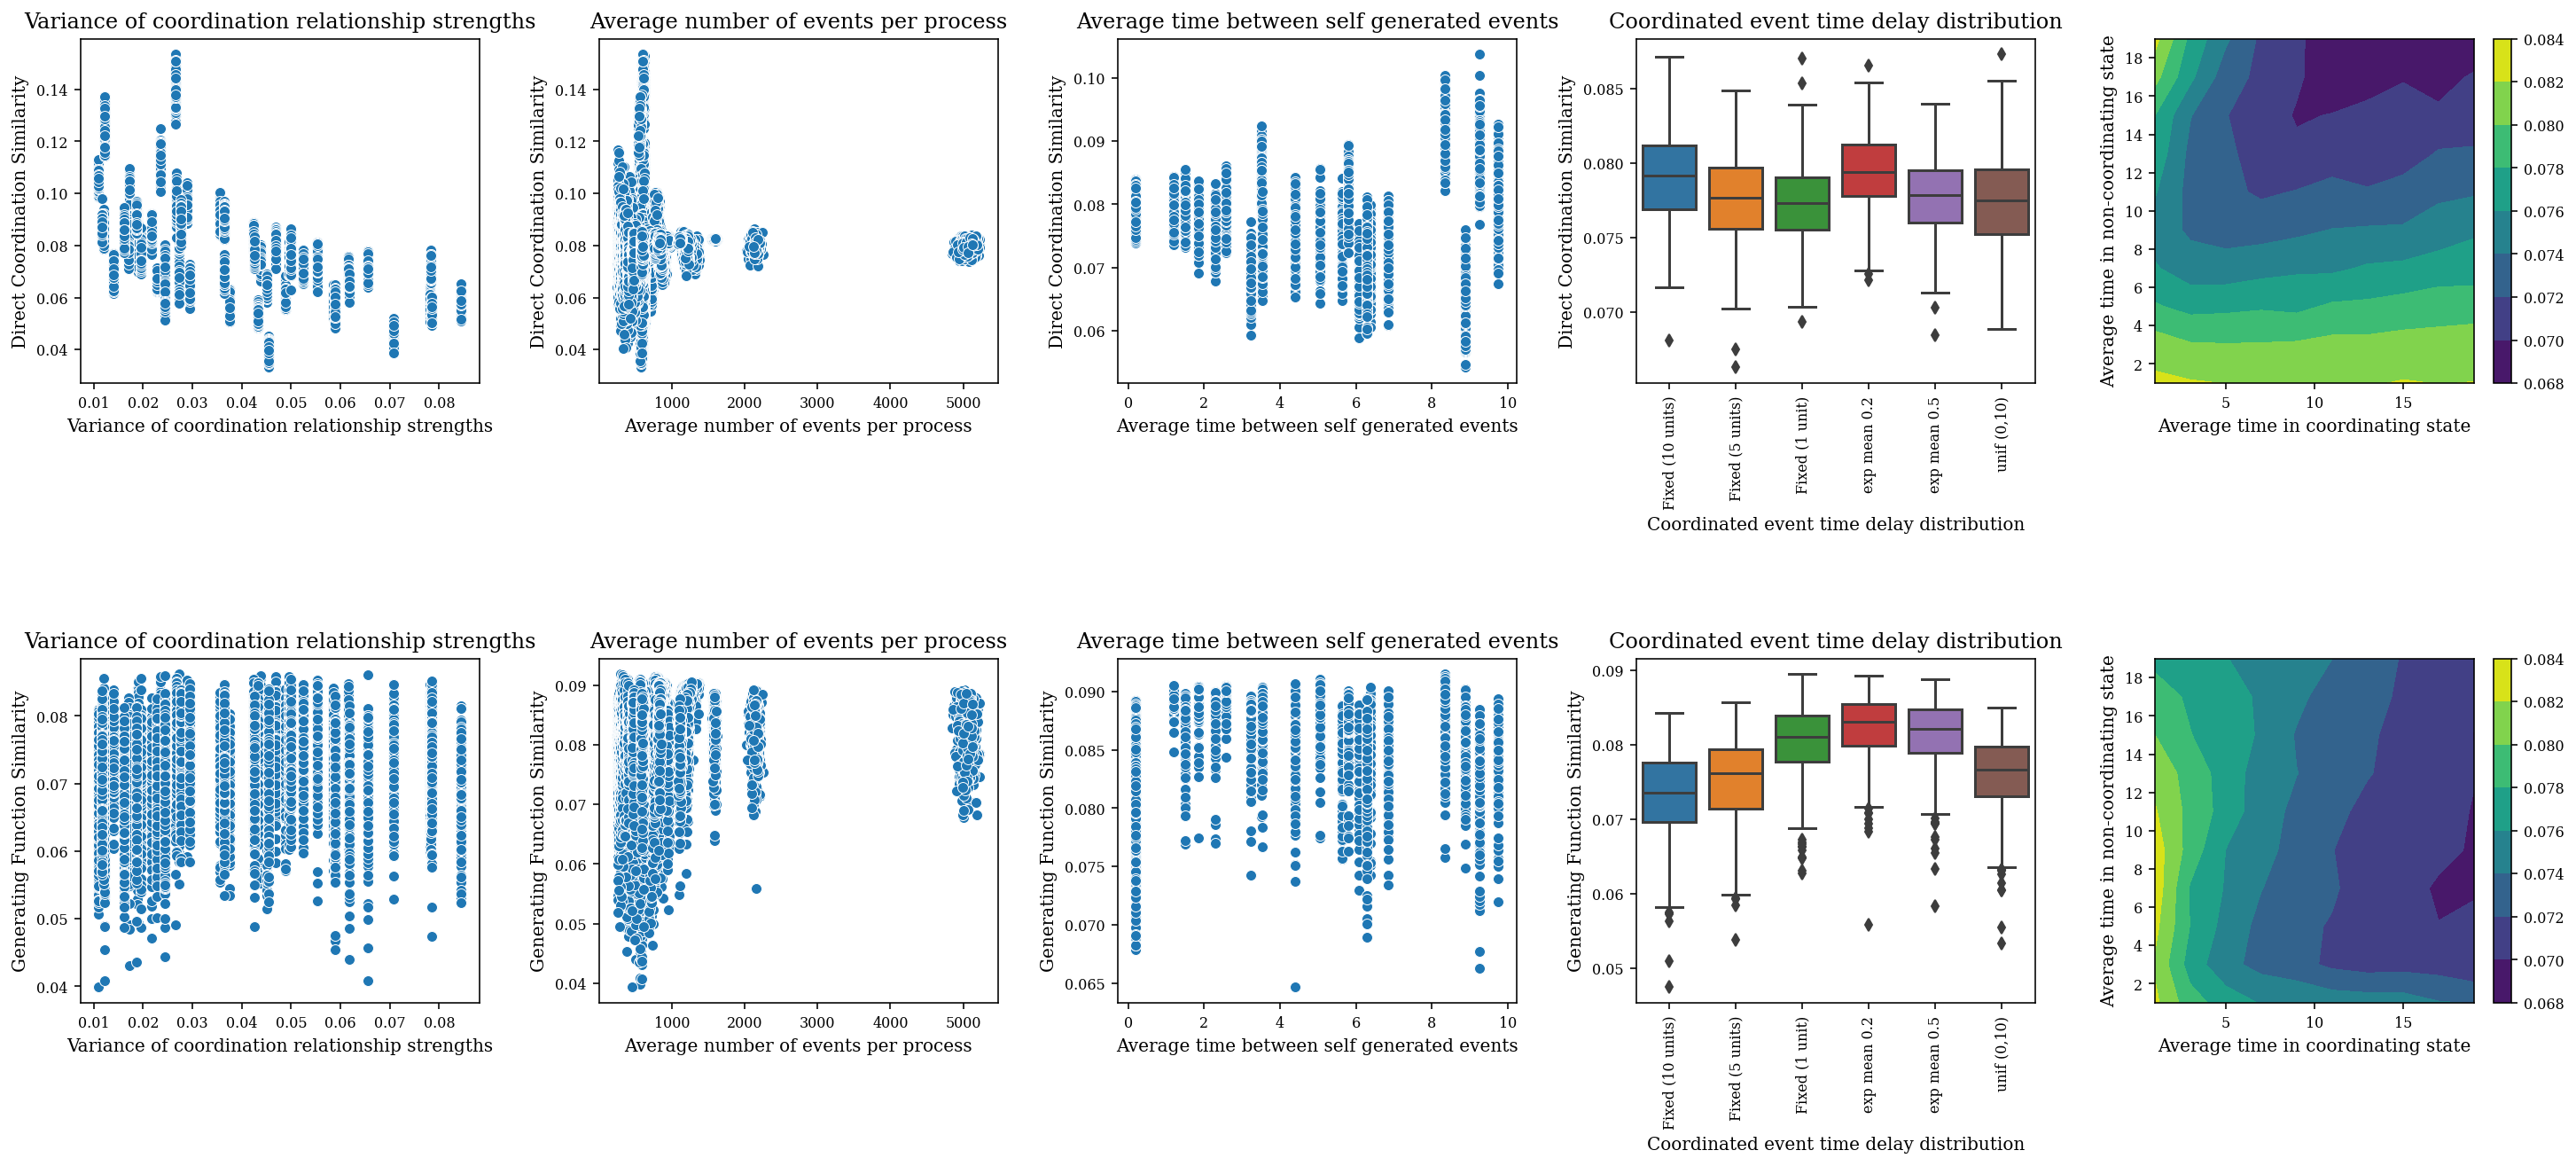

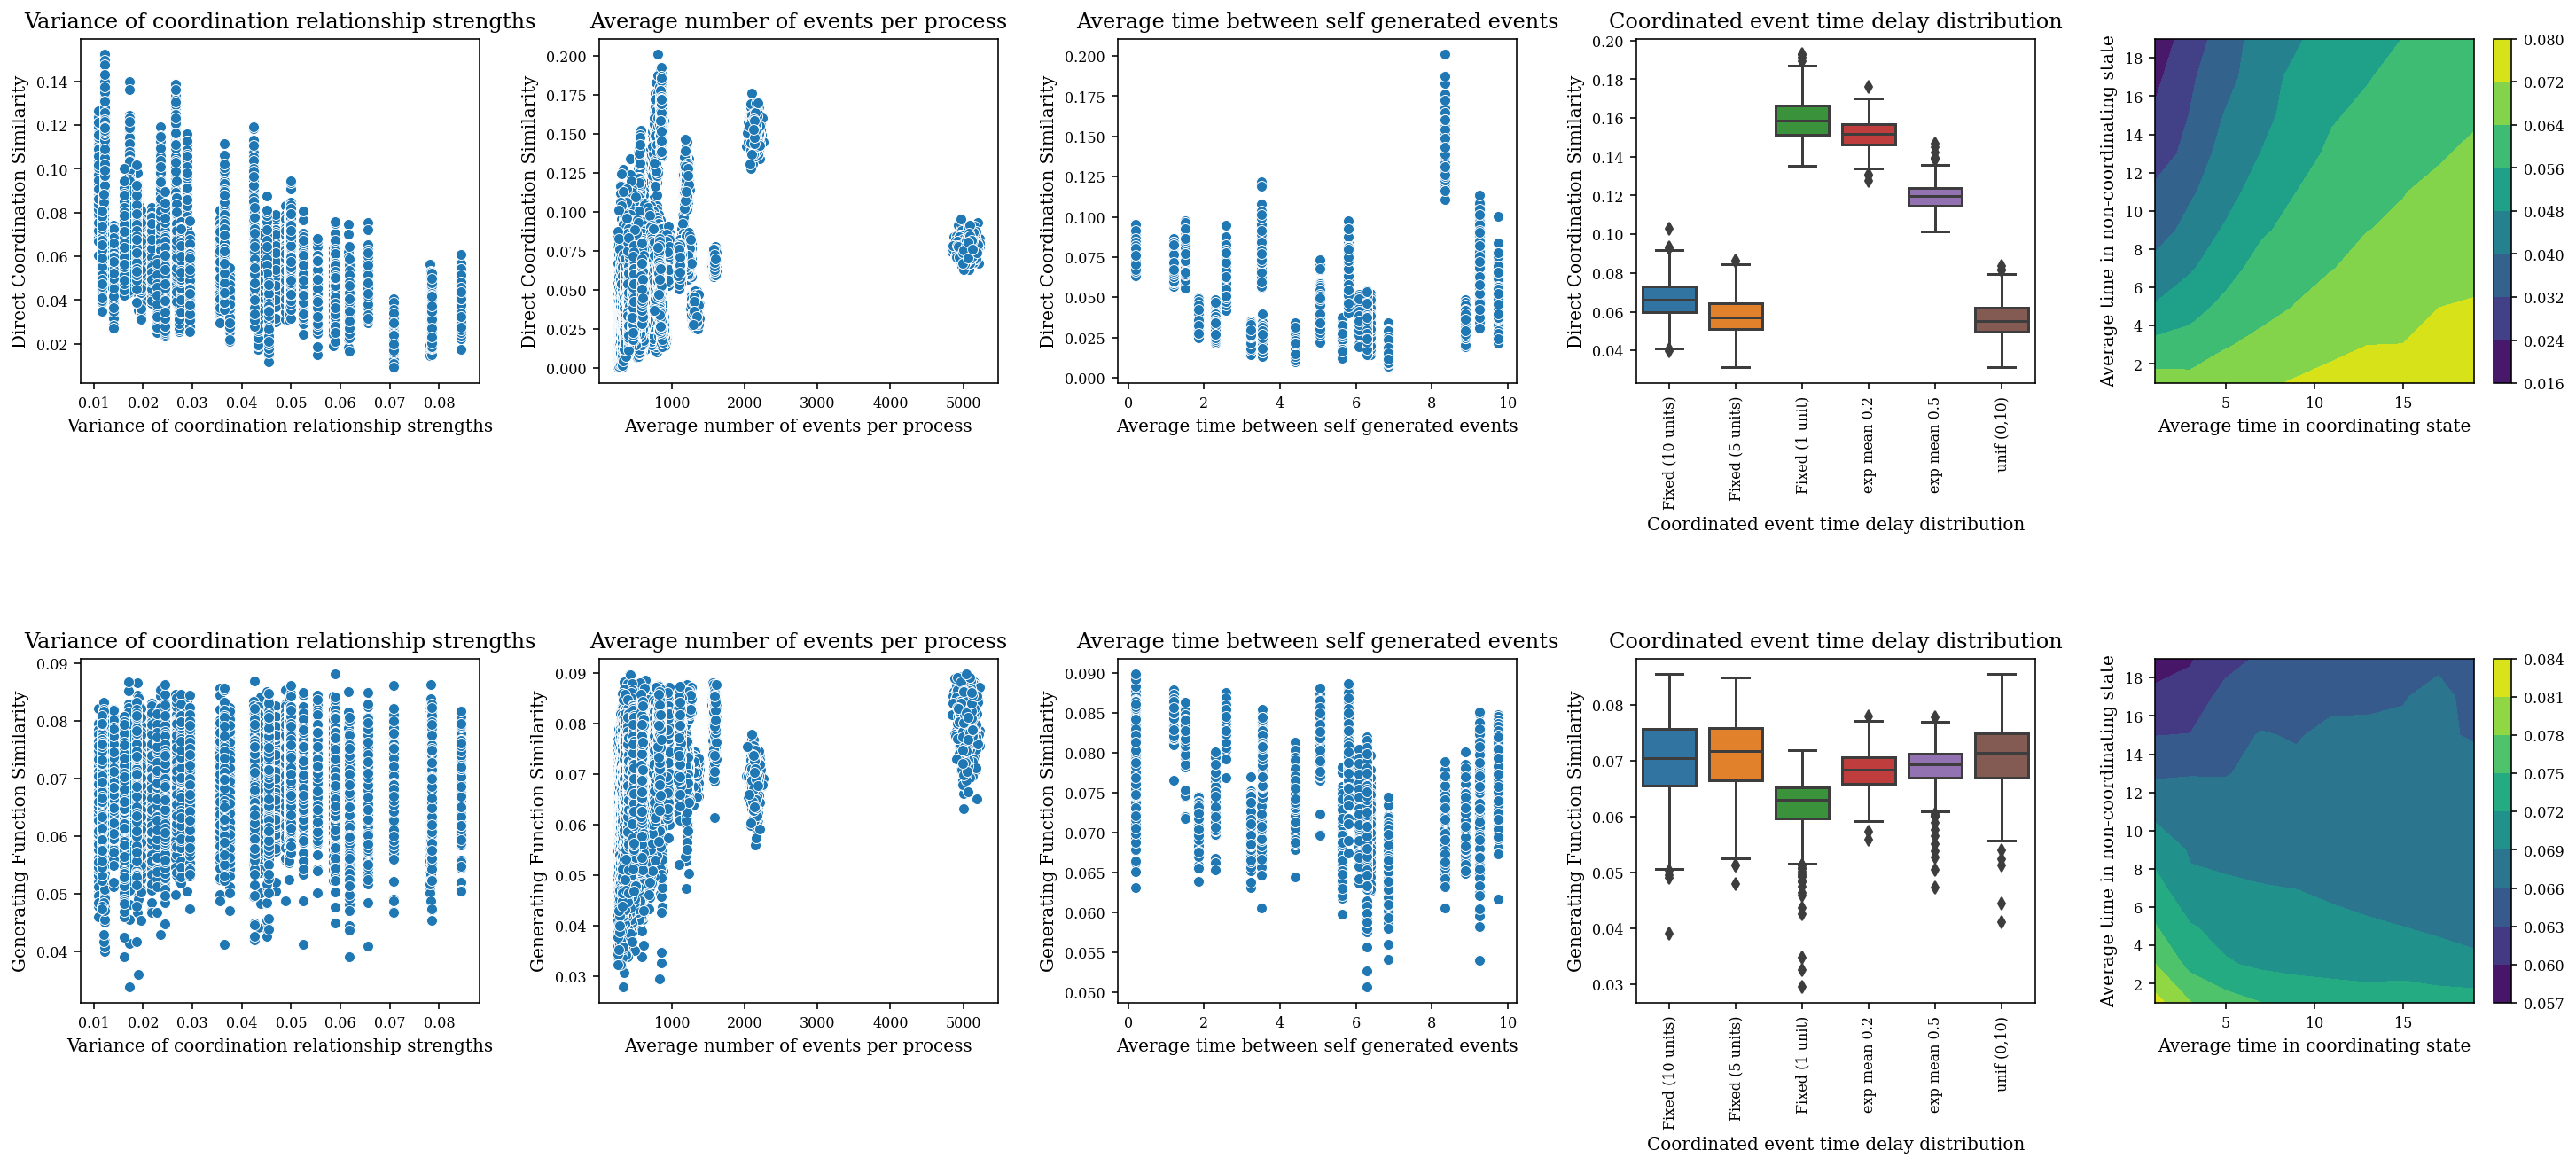

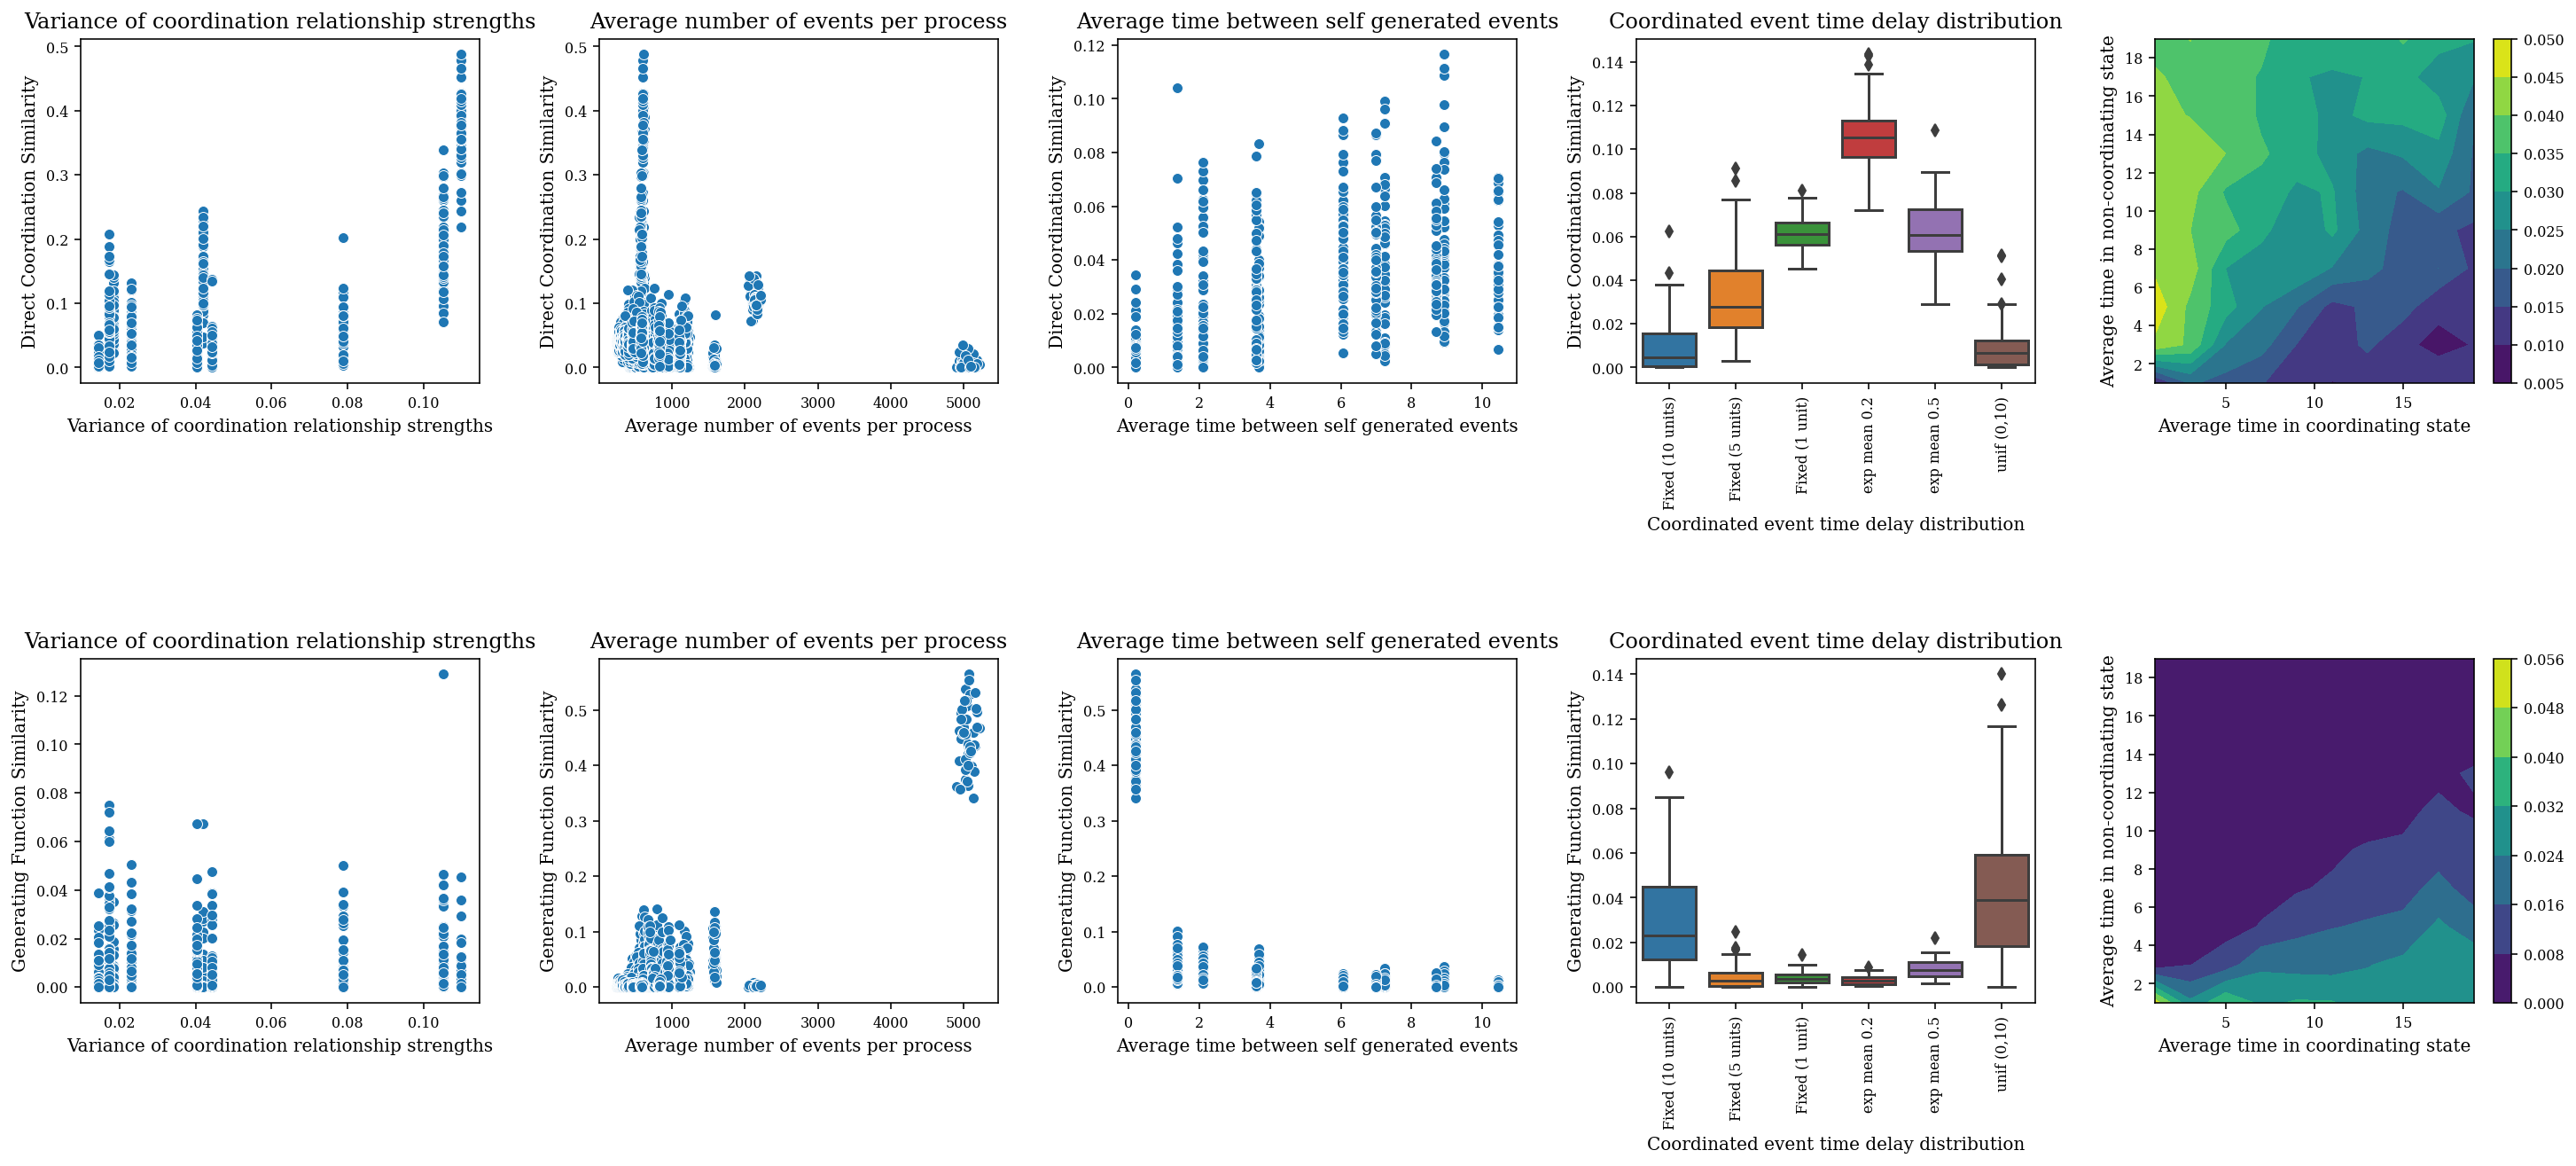

In [193]:
for x in set(df.metric_func.values):
    df_plot = df[df.metric_func == x]

    # with open(f'results/{names[ind]}_results.pkl', 'wb') as f:
    #     pickle.dump(df_plot, f)

    fig= plt.figure(figsize=(25,10))

    ax0 = fig.add_subplot(2, 5, 1)
    # plt.suptitle(f"{names[ind]}", size=16,y=1.02)
    # coord param
    sns.scatterplot(data = df_plot[df_plot.to_target == 'A'], y = 'Direct Coordination Similarity',x='Edge weight variance', ax=ax0)
    ax0.set_title('Variance of coordination relationship strengths')
    ax0.set_xlabel('Variance of coordination relationship strengths')

    ax10 = fig.add_subplot(2, 5, 2)
    # coord param
    sns.scatterplot(data = df_plot, y = 'Direct Coordination Similarity',x='N', ax=ax10)
    ax10.set_title('Average number of events per process')
    ax10.set_xlabel('Average number of events per process')

    ax2 = fig.add_subplot(2, 5, 4)
    # time decay
    sns.boxplot(data = df_plot[df_plot.to_target == 'decay_func'], y = 'Direct Coordination Similarity',x='Time delay function', ax=ax2)
    ax2.tick_params(axis='x',labelrotation=90)
    ax2.set_title('Coordinated event time delay distribution')
    ax2.set_xlabel('Coordinated event time delay distribution')

    ax3 = fig.add_subplot(2, 5, 3)
    # time decay
    sns.scatterplot(data = df_plot[df_plot.to_target == 'lambdas'], y = 'Direct Coordination Similarity',x='Mean Rate of self-excited events', ax=ax3)
    ax3.set_xlabel('Average time between self generated events')
    ax3.set_title('Average time between self generated events')
    ax13d= fig.add_subplot(2, 5, 5)#, projection='3d')
    df_av_ = df_plot[df_plot.to_target == 'c_t_params']
    df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Direct Coordination Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
    dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Direct Coordination Similarity')
    CS = ax13d.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis)
    cbar = fig.colorbar(CS, ax = ax13d)
    # ax13d.plot_trisurf(df_av_['Average time in coordinating state'], df_av_['Average time in non-coordinating state'], df_av_['Direct Coordination Similarity'], cmap=plt.cm.viridis, linewidth=0.2)
    ax13d.set_xlabel('Average time in coordinating state')
    ax13d.set_ylabel('Average time in non-coordinating state')
    # ax13d.set_zlabel('Direct Coordination Similarity')


    ax4 = fig.add_subplot(2, 5, 6)
    # coord param
    sns.scatterplot(data = df_plot[df_plot.to_target == 'A'], y = 'Generating Function Similarity',x='Edge weight variance', ax=ax4)
    ax4.set_title('Variance of coordination relationship strengths')
    ax4.set_xlabel('Variance of coordination relationship strengths')

    ax9 = fig.add_subplot(2, 5, 7)
    # coord param
    sns.scatterplot(data = df_plot, y = 'Generating Function Similarity',x='N', ax=ax9)
    ax9.set_title('Average number of events per process')
    ax9.set_xlabel('Average number of events per process')

    ax5 = fig.add_subplot(2, 5, 9)
    # time decay
    sns.boxplot(data = df_plot[df_plot.to_target == 'decay_func'], y = 'Generating Function Similarity',x='Time delay function', ax=ax5)
    ax5.tick_params(axis='x',labelrotation=90)
    ax5.set_title('Coordinated event time delay distribution')
    ax5.set_xlabel('Coordinated event time delay distribution')
    ax6 = fig.add_subplot(2, 5, 8)
    # time decay
    sns.scatterplot(data = df_plot[df_plot.to_target == 'lambdas'], y = 'Generating Function Similarity',x='Mean Rate of self-excited events', ax=ax6)
    ax6.set_xlabel('Average time between self generated events')
    ax6.set_title('Average time between self generated events')

    ax13d2= fig.add_subplot(2, 5, 10)#, projection='3d')
    df_av_ = df_plot[df_plot.to_target == 'c_t_params']
    df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Generating Function Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
    dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Generating Function Similarity')
    CS = ax13d2.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis)
    cbar = fig.colorbar(CS, ax = ax13d2)
    # ax13d2.plot_trisurf(df_av_['Average time in coordinating state'], df_av_['Average time in non-coordinating state'], df_av_['Generating Function Similarity'], cmap=plt.cm.viridis, linewidth=0.2)
    ax13d2.set_xlabel('Average time in coordinating state')
    ax13d2.set_ylabel('Average time in non-coordinating state')
    # ax13d2.set_zlabel('Generating Function Similarity')
    plt.subplots_adjust(hspace=0.8, wspace=0.3)

    plt.savefig(f'figures/{x}_plot.pdf', bbox_inches = 'tight')
        

# smaller plots for results section

In [182]:
set(df.metric_func.values)

{'cooccurance_count_1',
 'cooccurance_count_10',
 'cooccurance_count_5',
 'exp_time_delta',
 'median_time_delta',
 'time_agnostic',
 'transfer_entropy',
 'var_time_delta'}

In [183]:
df_plot_cooccur1 = df[df.metric_func == 'cooccurance_count_1']
df_plot_cooccur5 = df[df.metric_func == 'cooccurance_count_5']
df_plot_cooccur10 = df[df.metric_func == 'cooccurance_count_10']
df_plot_exp = df[df.metric_func == 'exp_time_delta']
df_plot_median = df[df.metric_func == 'median_time_delta']
df_plot_var = df[df.metric_func == 'var_time_delta']
df_plot_timeag = df[df.metric_func == 'time_agnostic']
df_plot_TE = df[df.metric_func == 'transfer_entropy']
        

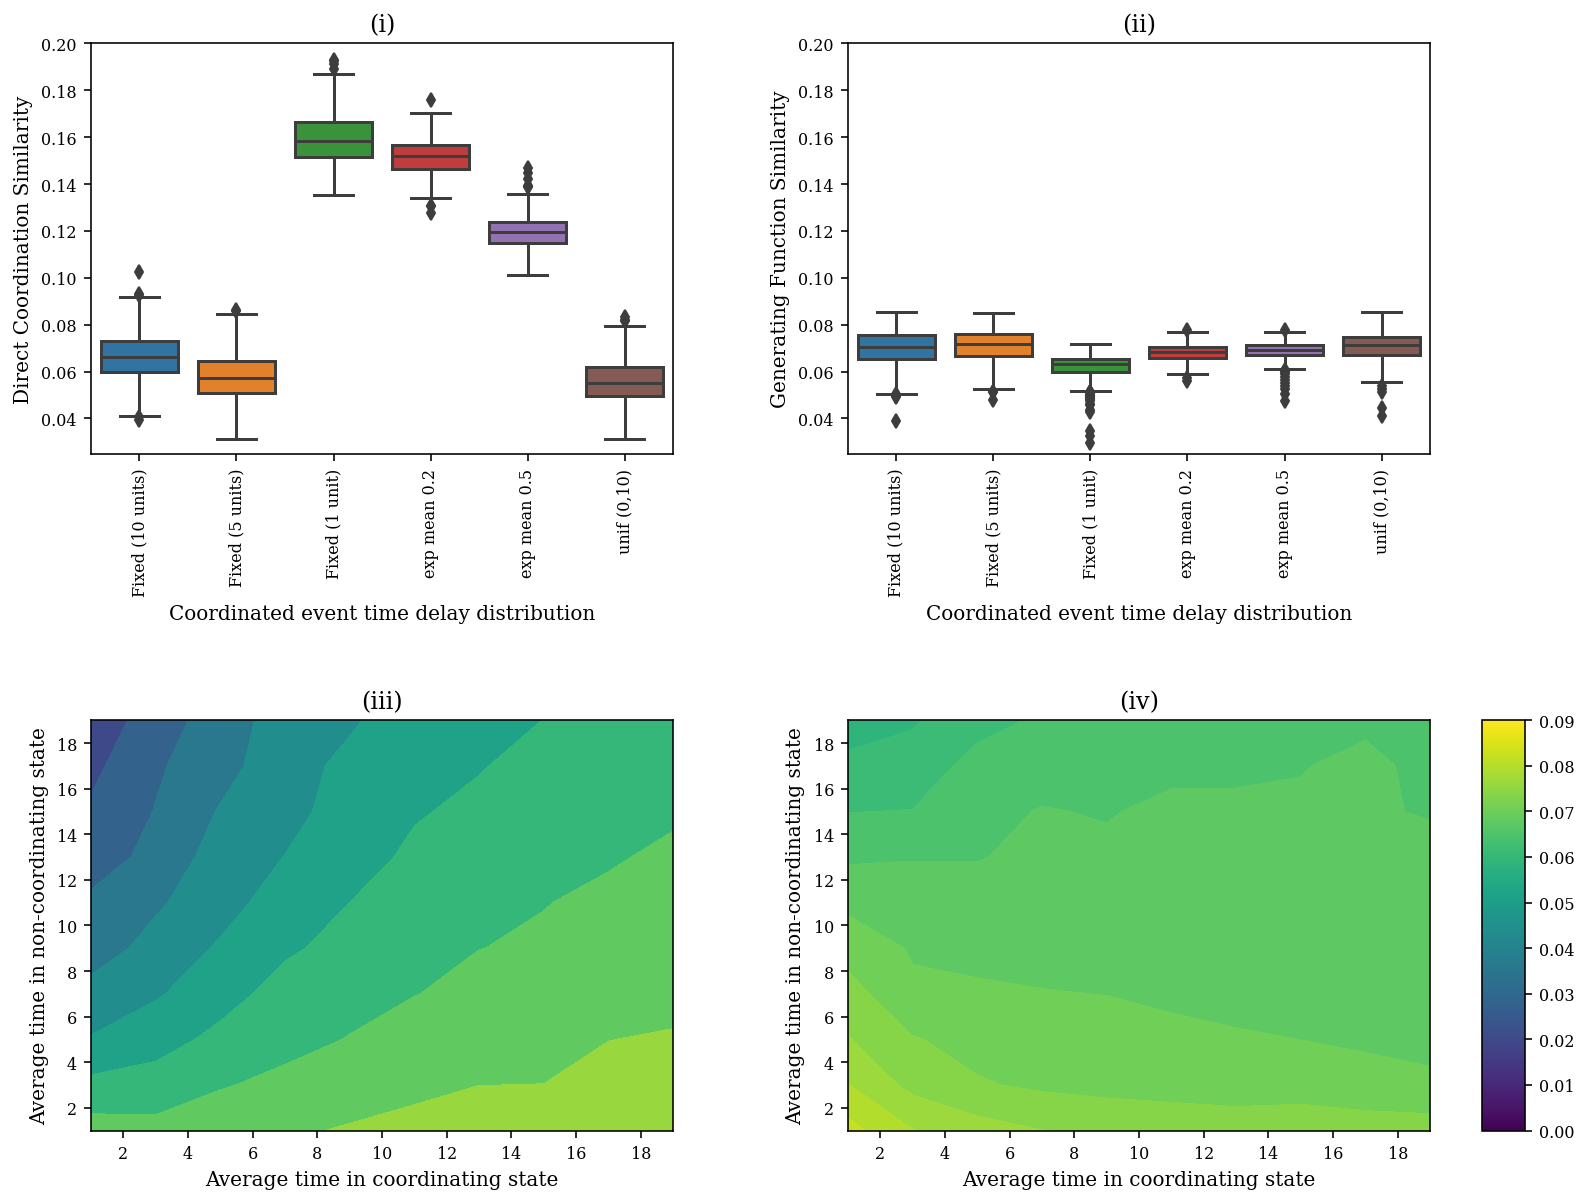

In [184]:
# DC vs GS
fig= plt.figure(figsize=(12,10))
normalizer=Normalize(0,0.09)
im=plt.cm.ScalarMappable(norm=normalizer)

ax1 = fig.add_subplot(2, 2, 1)
sns.boxplot(data = df_plot_cooccur1[df_plot_cooccur1.to_target == 'decay_func'], y = 'Direct Coordination Similarity',x='Time delay function', ax=ax1)
ax1.tick_params(axis='x',labelrotation=90)
ax1.set_title('(i)')
ax1.set_xlabel('Coordinated event time delay distribution')
ax1.set_ylim(0.025,0.2)

ax2 = fig.add_subplot(2, 2, 2)
sns.boxplot(data = df_plot_cooccur1[df_plot_cooccur1.to_target == 'decay_func'], y = 'Generating Function Similarity',x='Time delay function', ax=ax2)
ax2.tick_params(axis='x',labelrotation=90)
ax2.set_title('(ii)')
ax2.set_xlabel('Coordinated event time delay distribution')
ax2.set_ylim(0.025,0.2)


ax13d= fig.add_subplot(2, 2, 3)
df_av_ = df_plot_cooccur1[df_plot_cooccur1.to_target == 'c_t_params']
df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Direct Coordination Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Direct Coordination Similarity')
CS = ax13d.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis, norm = normalizer)
# cbar = fig.colorbar(CS, ax = ax13d)
ax13d.set_xlabel('Average time in coordinating state')
ax13d.set_ylabel('Average time in non-coordinating state')
ax13d.set_title('(iii)')

ax23d= fig.add_subplot(2, 2, 4)
df_av_ = df_plot_cooccur1[df_plot_cooccur1.to_target == 'c_t_params']
df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Generating Function Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Generating Function Similarity')
CS = ax23d.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis, norm = normalizer)
# cbar = fig.colorbar(CS, ax = ax23d)
ax23d.set_xlabel('Average time in coordinating state')
ax23d.set_ylabel('Average time in non-coordinating state')
ax23d.set_title('(iv)')

cax = plt.axes([0.93, 0.125, 0.025, 0.285])
cbar = fig.colorbar(im,ax = [ax13d,ax23d],cax=cax )


plt.subplots_adjust(hspace=0.65, wspace=0.3)
plt.savefig(f'figures/GSvsDC.pdf', bbox_inches = 'tight')

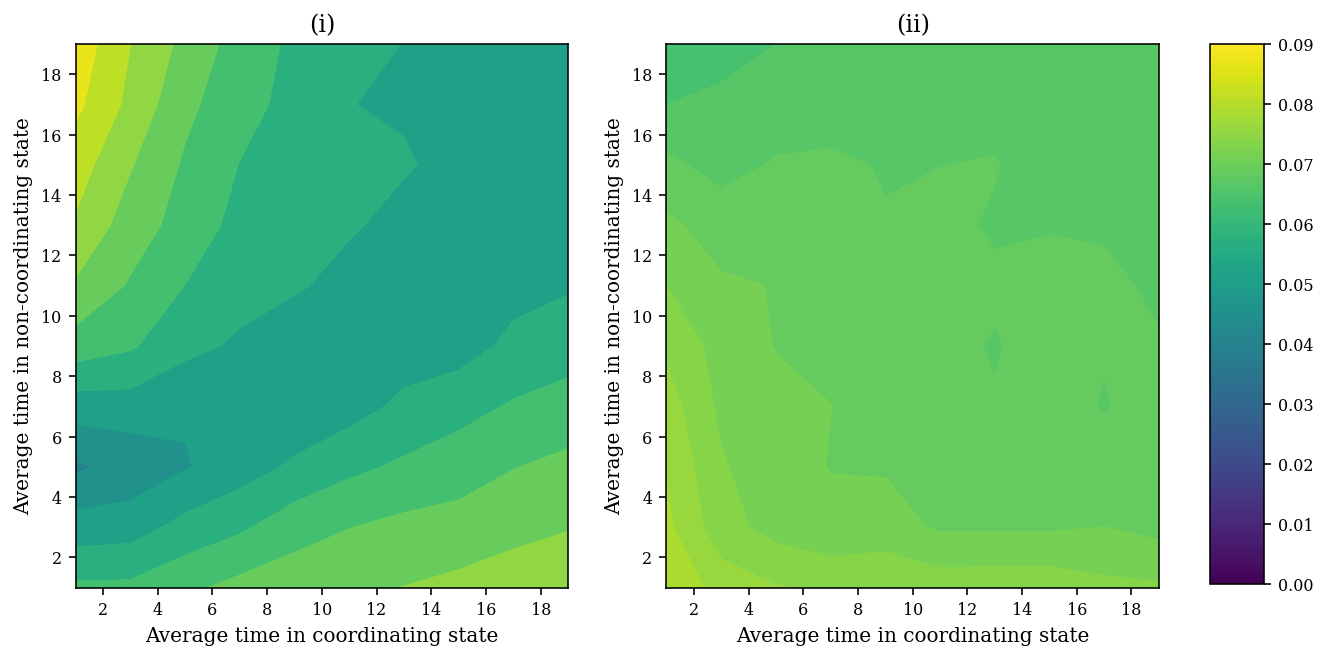

In [185]:
# DC vs GS
fig= plt.figure(figsize=(15,5))
from matplotlib.colors import Normalize

normalizer=Normalize(0,0.09)
im=plt.cm.ScalarMappable(norm=normalizer)

ax13d= fig.add_subplot(1, 3, 1)
df_av_ = df_plot_median[df_plot_median.to_target == 'c_t_params']
df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Direct Coordination Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Direct Coordination Similarity')
CS = ax13d.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis,norm=normalizer)
# cbar = fig.colorbar(CS, ax = ax13d)
ax13d.set_xlabel('Average time in coordinating state')
ax13d.set_ylabel('Average time in non-coordinating state')
ax13d.set_title('(i)')

ax23d= fig.add_subplot(1, 3, 2)
df_av_ = df_plot_exp[df_plot_exp.to_target == 'c_t_params']
df_av_ = df_av_[['Average time in coordinating state','Average time in non-coordinating state','Generating Function Similarity']].groupby(['Average time in coordinating state','Average time in non-coordinating state']).mean().reset_index()
dv_av_ = df_av_.pivot(index = 'Average time in coordinating state', columns= 'Average time in non-coordinating state', values = 'Generating Function Similarity')
CS = ax23d.contourf(dv_av_.index.values, dv_av_.columns.values,dv_av_, cmap=plt.cm.viridis, norm=normalizer)
# cbar = fig.colorbar(CS, ax = ax23d)
ax23d.set_xlabel('Average time in coordinating state')
ax23d.set_ylabel('Average time in non-coordinating state')
ax23d.set_title('(ii)')

# ax3 = fig.add_subplot(1, 3, 3)
cax = plt.axes([0.65, 0.13, 0.025, 0.75])
cbar = fig.colorbar(im,ax = [ax13d,ax23d],cax=cax )


plt.subplots_adjust(hspace=0.65, wspace=0.2)
plt.savefig(f'figures/extremecoord.pdf', bbox_inches = 'tight')

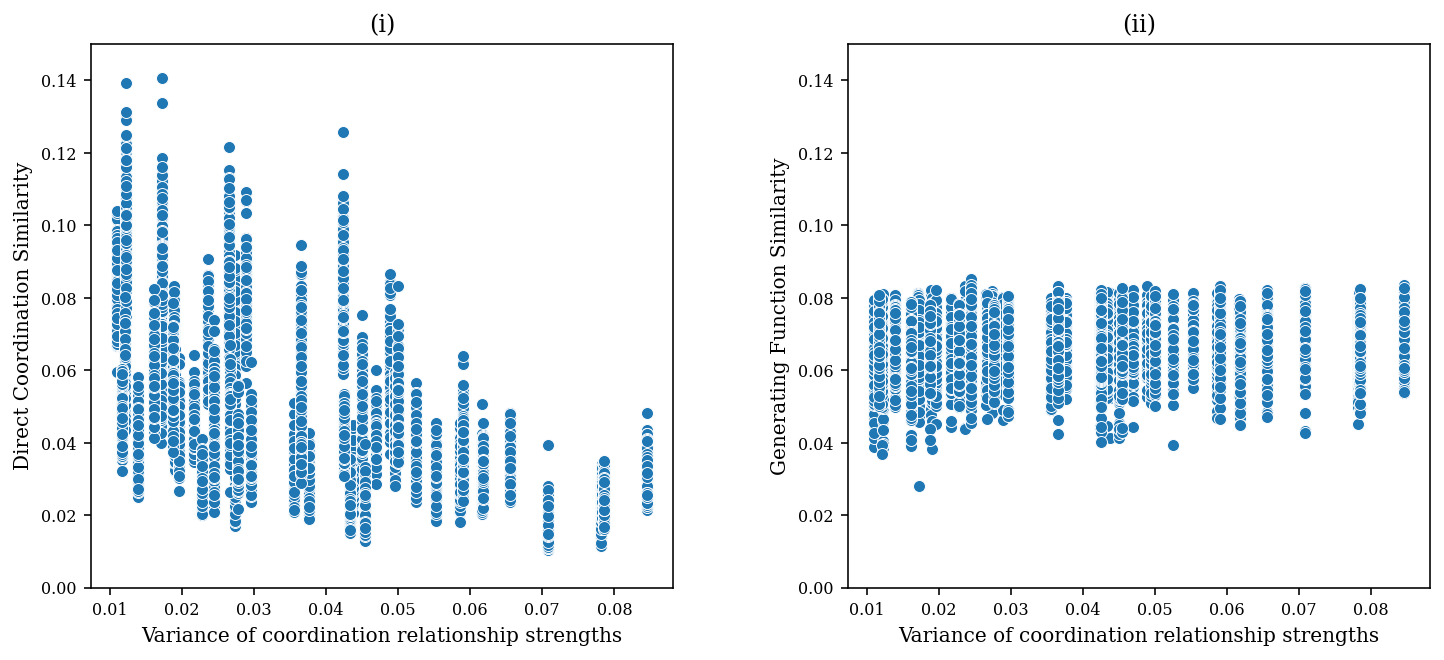

In [186]:
# var A

fig= plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(data = df_plot_median[df_plot_median.to_target == 'A'], y = 'Direct Coordination Similarity',x='Edge weight variance', ax=ax1)
ax1.set_title('Variance of coordination relationship strengths')
ax1.set_xlabel('Variance of coordination relationship strengths')
ax1.set_title('(i)')
ax1.set_ylim(0,0.15)

ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(data = df_plot_median[df_plot_median.to_target == 'A'], y = 'Generating Function Similarity',x='Edge weight variance', ax=ax2)
ax2.set_title('Variance of coordination relationship strengths')
ax2.set_xlabel('Variance of coordination relationship strengths')
ax2.set_title('(ii)')
ax2.set_ylim(0,0.15)

plt.subplots_adjust(wspace=0.3)
plt.savefig(f'figures/varA.pdf', bbox_inches = 'tight')

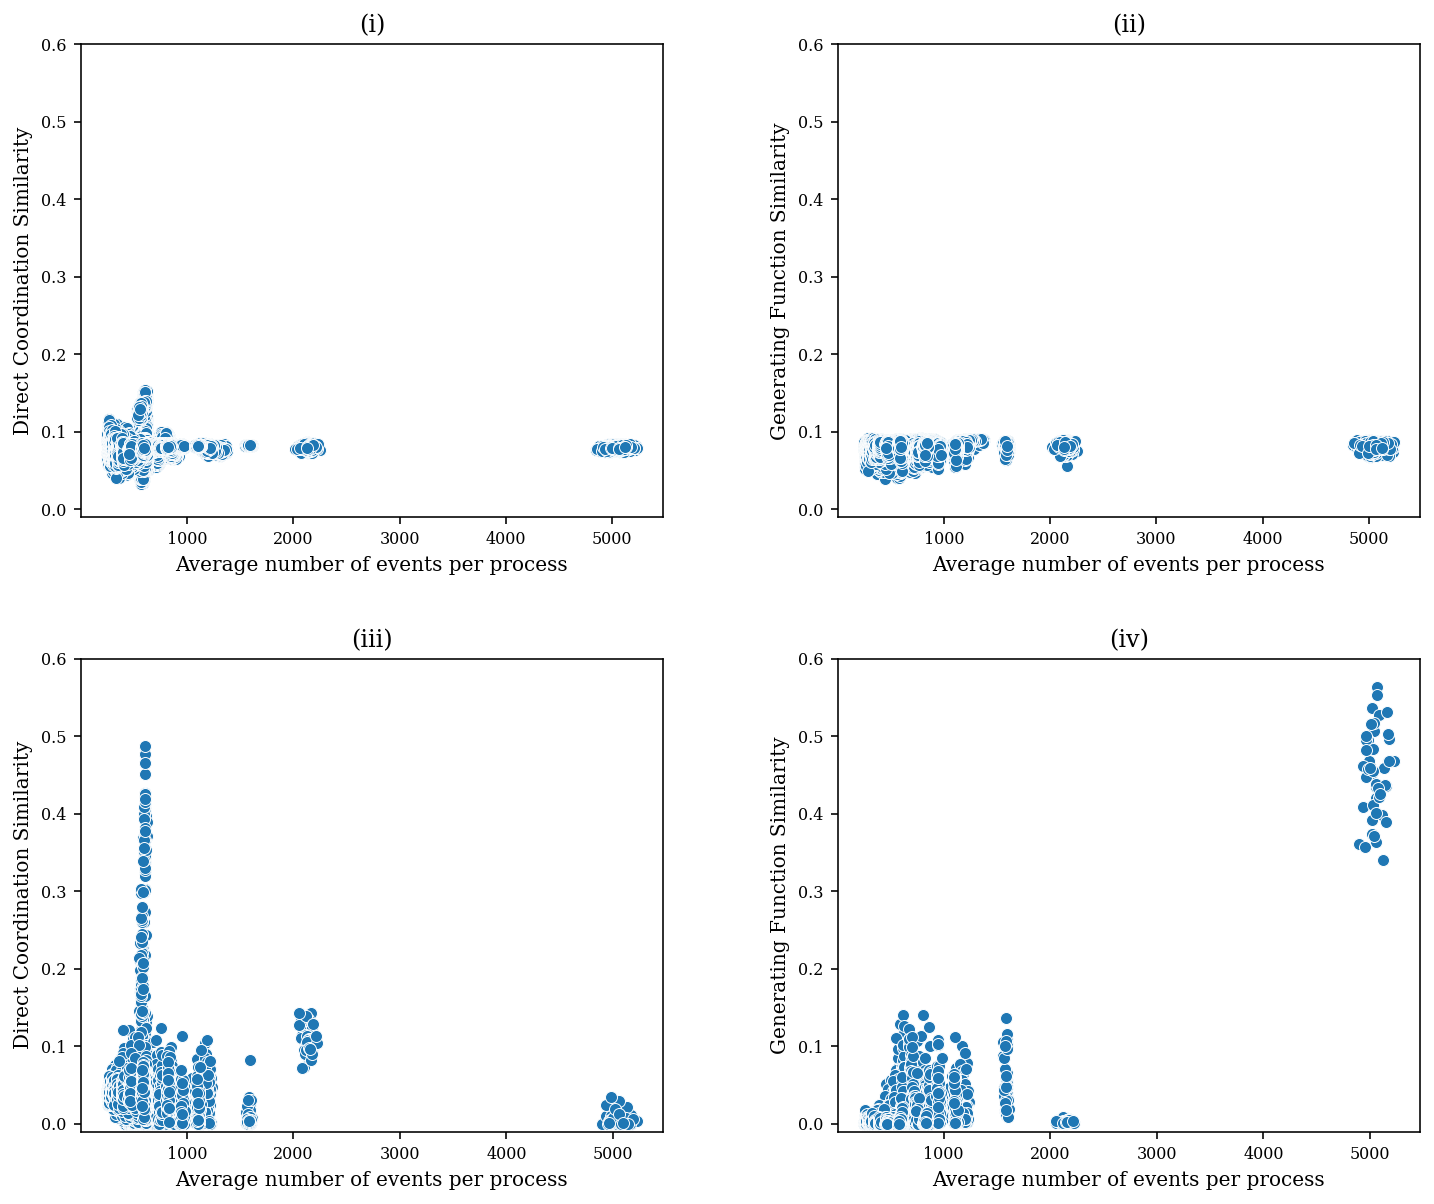

In [187]:
# N events

fig= plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(data = df_plot_cooccur10, y = 'Direct Coordination Similarity',x='N', ax=ax1)
ax1.set_title('Average number of events per process')
ax1.set_xlabel('Average number of events per process')
ax1.set_title('(i)')
ax1.set_ylim(-0.01,0.6)

ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(data = df_plot_cooccur10, y = 'Generating Function Similarity',x='N', ax=ax2)
ax2.set_title('Average number of events per process')
ax2.set_xlabel('Average number of events per process')
ax2.set_title('(ii)')
ax2.set_ylim(-0.01,0.6)

ax3 = fig.add_subplot(2, 2, 3)
sns.scatterplot(data = df_plot_TE, y = 'Direct Coordination Similarity',x='N', ax=ax3)
ax3.set_title('Average number of events per process')
ax3.set_xlabel('Average number of events per process')
ax3.set_title('(iii)')
ax3.set_ylim(-0.01,0.6)

ax4 = fig.add_subplot(2, 2, 4)
sns.scatterplot(data = df_plot_TE, y = 'Generating Function Similarity',x='N', ax=ax4)
ax4.set_title('Average number of events per process')
ax4.set_xlabel('Average number of events per process')
ax4.set_title('(iv)')
ax4.set_ylim(-0.01,0.6)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.savefig(f'figures/N_events.pdf', bbox_inches = 'tight')

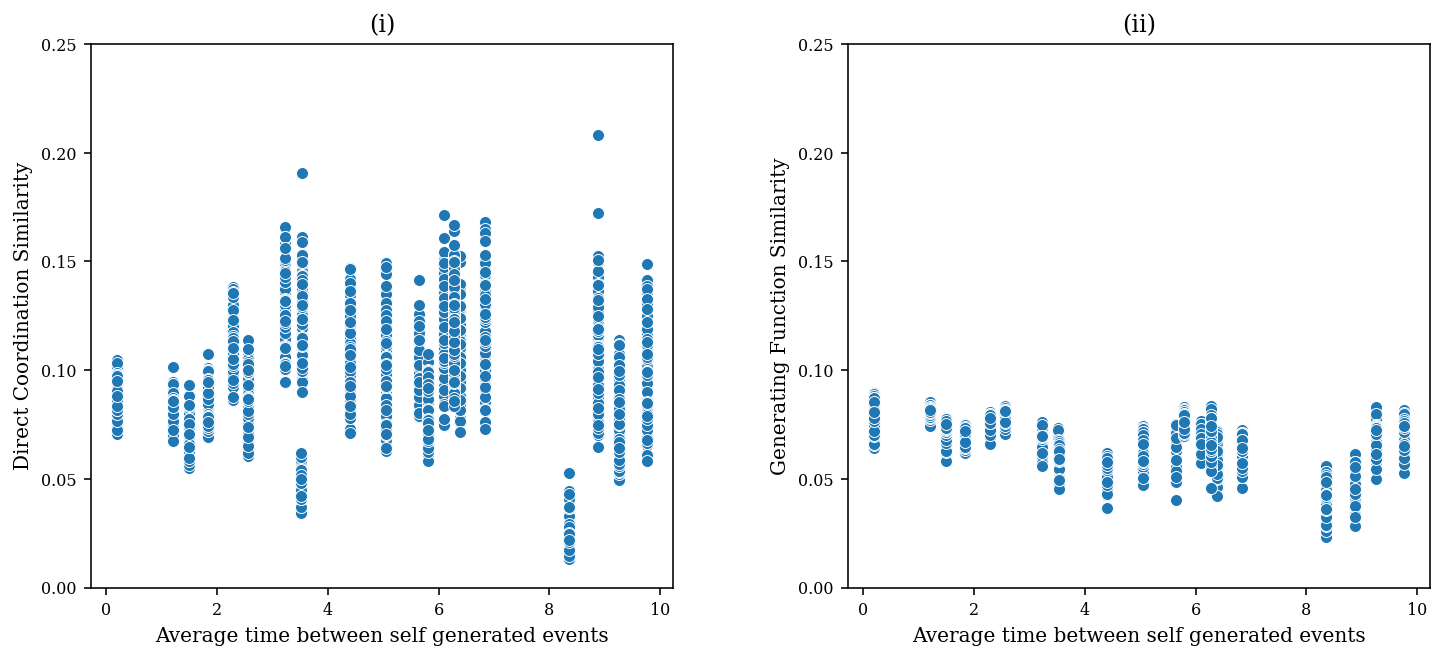

In [194]:
# time between self excited events
# var A

fig= plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(data = df_plot_exp[df_plot_exp.to_target == 'lambdas'], y = 'Direct Coordination Similarity',x='Mean Rate of self-excited events', ax=ax1)
ax1.set_title('Average time between self generated events')
ax1.set_xlabel('Average time between self generated events')
ax1.set_title('(i)')
ax1.set_ylim(0,0.25)

ax2 = fig.add_subplot(1, 2, 2)
sns.scatterplot(data = df_plot_exp[df_plot_exp.to_target == 'lambdas'], y = 'Generating Function Similarity',x='Mean Rate of self-excited events', ax=ax2)
ax2.set_title('Average time between self generated events')
ax2.set_xlabel('Average time between self generated events')
ax2.set_title('(ii)')
ax2.set_ylim(0,0.25)

plt.subplots_adjust(wspace=0.3)
plt.savefig(f'figures/delTlambda.pdf', bbox_inches = 'tight')


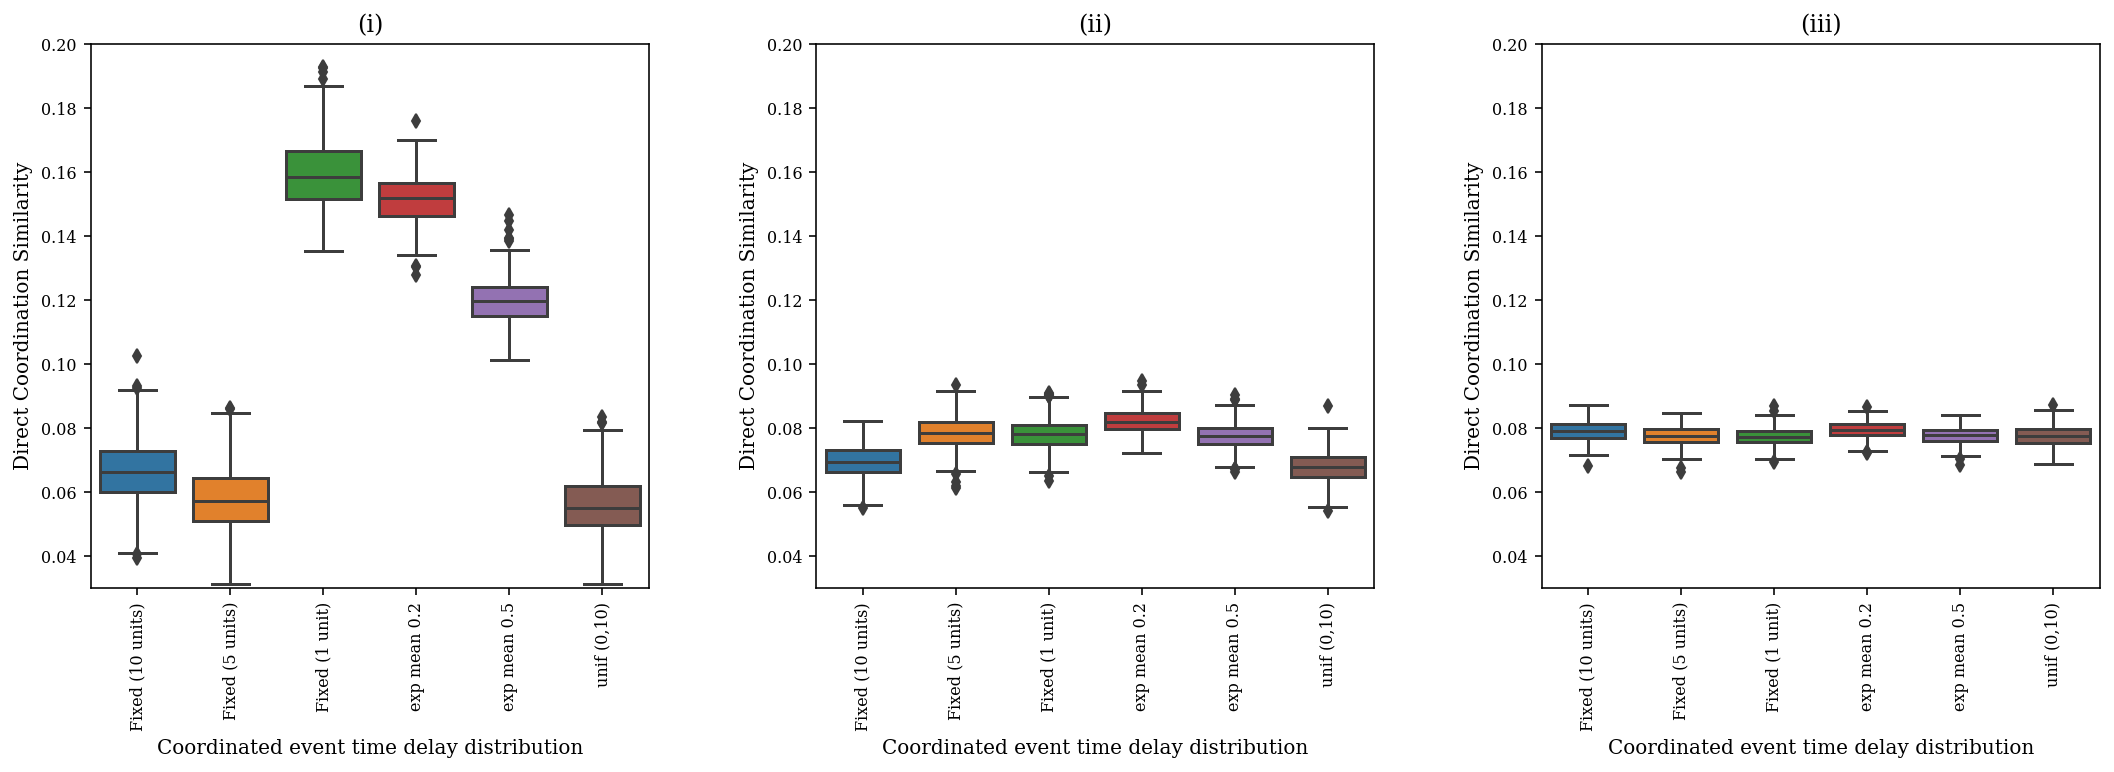

In [189]:
# DC vs GS
fig= plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1, 3, 1)
sns.boxplot(data = df_plot_cooccur1[df_plot_cooccur1.to_target == 'decay_func'], y = 'Direct Coordination Similarity',x='Time delay function', ax=ax1)
ax1.tick_params(axis='x',labelrotation=90)
ax1.set_title('Coordinated event time delay distribution')
ax1.set_ylim(0.03,0.2)
ax1.set_xlabel('Coordinated event time delay distribution')
ax1.set_title('(i)')

# ax4 = fig.add_subplot(2, 3, 4)
# sns.boxplot(data = df_plot_cooccur1[df_plot_cooccur1.to_target == 'decay_func'], y = 'Generating Function Similarity',x='Time delay function', ax=ax4)
# ax4.tick_params(axis='x',labelrotation=90)
# ax4.set_title('Coordinated event time delay distribution')
# ax4.set_xlabel('Coordinated event time delay distribution')
# ax4.set_title('(iv)')

ax2 = fig.add_subplot(1, 3, 2)
sns.boxplot(data = df_plot_cooccur5[df_plot_cooccur5.to_target == 'decay_func'], y = 'Direct Coordination Similarity',x='Time delay function', ax=ax2)
ax2.tick_params(axis='x',labelrotation=90)
ax2.set_title('Coordinated event time delay distribution')
ax2.set_xlabel('Coordinated event time delay distribution')
ax2.set_title('(ii)')
ax2.set_ylim(0.03,0.2)

# ax5 = fig.add_subplot(2, 3, 5)
# sns.boxplot(data = df_plot_cooccur5[df_plot_cooccur5.to_target == 'decay_func'], y = 'Generating Function Similarity',x='Time delay function', ax=ax5)
# ax5.tick_params(axis='x',labelrotation=90)
# ax5.set_title('Coordinated event time delay distribution')
# ax5.set_xlabel('Coordinated event time delay distribution')
# ax5.set_title('(v)')

ax3 = fig.add_subplot(1, 3, 3)
sns.boxplot(data = df_plot_cooccur10[df_plot_cooccur10.to_target == 'decay_func'], y = 'Direct Coordination Similarity',x='Time delay function', ax=ax3)
ax3.tick_params(axis='x',labelrotation=90)
ax3.set_title('Coordinated event time delay distribution')
ax3.set_xlabel('Coordinated event time delay distribution')
ax3.set_title('(iii)')
ax3.set_ylim(0.03,0.2)

# ax6 = fig.add_subplot(2, 3, 6)
# sns.boxplot(data = df_plot_cooccur10[df_plot_cooccur10.to_target == 'decay_func'], y = 'Generating Function Similarity',x='Time delay function', ax=ax6)
# ax6.tick_params(axis='x',labelrotation=90)
# ax6.set_title('Coordinated event time delay distribution')
# ax6.set_xlabel('Coordinated event time delay distribution')
# ax6.set_title('(vi)')

plt.subplots_adjust(hspace=0.65, wspace=0.3)
plt.savefig(f'figures/timedel.pdf', bbox_inches = 'tight')